# 🏥 Breast Cancer Diagnosis Benchmark
### **A Comparative Analysis of 8 Machine Learning Algorithms**
**Author:** Ashkan Ghorbani  
**Date:** February 2026  
**Repository:** [github.com/ashkanGhr/breast-cancer-diagnosis-benchmark](https://github.com/ashkanGhr/breast-cancer-diagnosis-benchmark)

---
**Project Overview:** This notebook implements a systematic benchmark of Linear, Tree-based, and Ensemble models (including AdaBoost and XGBoost) to predict breast cancer malignancy. It features a robust **Scikit-Learn Pipeline** with **SMOTE** for class imbalance, automated feature selection, and hyperparameter tuning optimized for **Recall**.

In [ ]:
# Dataset
from sklearn.datasets import load_breast_cancer

# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
from matplotlib.cbook import boxplot_stats
import plotly.express as ex
from imblearn.over_sampling import SMOTE

# Machine learning
from sklearn.experimental import enable_iterative_imputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LassoCV, Lasso, lasso_path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, StratifiedKFold, cross_validate, LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, confusion_matrix, RocCurveDisplay, roc_auc_score,recall_score,precision_score, classification_report, roc_curve, auc
import joblib
from xgboost import XGBClassifier
#from skopt import BayesSearchCV, space, plots
from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_classif, mutual_info_classif,SelectFdr, SelectKBest, SelectPercentile, SelectFpr, SelectFwe, VarianceThreshold, SelectFromModel
import statsmodels.api as sm

# Google drive
#from google.colab import drive
#drive.mount('/gdrive')



# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the datase
data = load_breast_cancer(as_frame=True)
df = data.frame

In [3]:
df, df_t = train_test_split(df, test_size=0.15, stratify=df['target'], random_state=42)

In [4]:
# Define X and Y
x = df.drop('target', axis=1)
y = df['target']

x_t = df_t.drop('target', axis=1)
y_t = df['target']

# EDA

In [5]:
# We create a new column 'diagnosis' just for visualization purposes
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

In [6]:
# ==========================================
# PART 1: BASIC DATA INSPECTION
# ==========================================

print("--- 1. Data Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- 2. Missing Values Check ---")
print(df.isnull().sum().sum())  # Should be 0 for this specific dataset

print("\n--- 3. Statistical Summary ---")
# Transpose (.T) makes it easier to read with 30 columns
display(df.describe().T)

--- 1. Data Shape ---
Rows: 483, Columns: 32

--- 2. Missing Values Check ---
0

--- 3. Statistical Summary ---


,count,mean,std,min,25%,50%,75%,max
mean radius,483.0,14.075014,3.467871,6.981000,11.680000,13.270000,15.720000,28.11000
mean texture,483.0,19.251905,4.362202,9.710000,16.110000,18.820000,21.710000,39.28000
mean perimeter,483.0,91.579586,23.915663,43.790000,74.935000,85.980000,103.650000,188.50000
mean area,483.0,648.748033,341.908962,143.500000,417.950000,542.900000,770.050000,2499.00000
mean smoothness,483.0,0.096109,0.013697,0.062510,0.086475,0.095160,0.105000,0.14470
mean compactness,483.0,0.103204,0.053191,0.019380,0.062730,0.090090,0.130100,0.34540
mean concavity,483.0,0.087946,0.080672,0.000000,0.028010,0.058920,0.131300,0.42680
mean concave points,483.0,0.048133,0.038681,0.000000,0.019685,0.032640,0.073820,0.20120
mean symmetry,483.0,0.180661,0.028040,0.106000,0.161650,0.178000,0.195500,0.30400
mean fractal dimension,483.0,0.062729,0.007151,0.049960,0.057585,0.061290,0.066250,0.09744


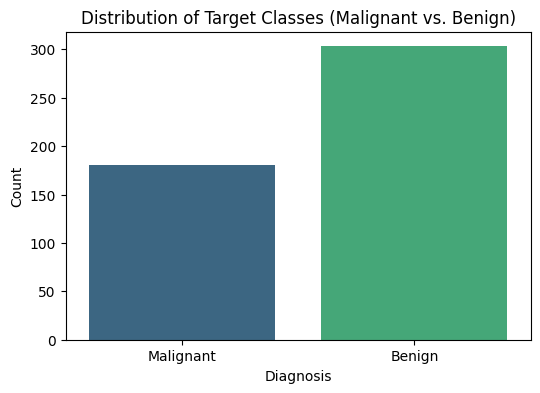

In [7]:
# ==========================================
# PART 2: TARGET DISTRIBUTION (Class Balance)
# ==========================================

plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribution of Target Classes (Malignant vs. Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# SMOTE

In [8]:
# Defining SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit SMOTE *only* on the training data
x_train_smote, y_train_smote = smote.fit_resample(x, y)

# 4. Verification
print("Original Class Distribution:\n", y.value_counts())
print("\nResampled Class Distribution:\n", y_train_smote.value_counts())
print(f"\nOriginal Train shape: {x.shape}")
print(f"New Train shape (SMOTE): {x_train_smote.shape}")

Original Class Distribution:
 target
1    303
0    180
Name: count, dtype: int64

Resampled Class Distribution:
 target
0    303
1    303
Name: count, dtype: int64

Original Train shape: (483, 30)
New Train shape (SMOTE): (606, 30)


In [9]:
# Overwrite x and y with the SMOTE-resampled data for subsequent analysis
x = x_train_smote
y = y_train_smote

# **Variance threshold**

In [10]:

### This peace of code is focused on removal of features which have low variance compared to other features
### Features with low variance does not contribute much on modeling performance, because they are nearly constant over the samples


from sklearn.feature_selection import VarianceThreshold

X=x 
Y=y 

# Variance Threshold
selector0 = VarianceThreshold(threshold=0.01).fit(X, Y) # This will remove features with variance below 0.01

# Extracting the index of selected columns
selected_features_mask = selector0.get_support() # Extracting the mask of selected features

# Extracting the name of remained columns of X
selected_features = X.columns[selected_features_mask] # Extracting the names of the features that have been selected based on variance threshold

# Converting the output to a DataFrame with the correct column names
X = pd.DataFrame(selector0.transform(X), columns=selected_features) # Updating X using the selected features


print(X.shape) # Printing the shape of X to verify its dimensions

# --- Append-only: also drop the same low-variance features from your dataframe(s) ---

# Columns removed by the variance filter (computed from the original feature set `x`)
low_var_cols = [c for c in x.columns if c not in selected_features]

# Update df if it exists (keeps 'target' intact)
if 'df' in globals():
    df.drop(columns=[c for c in low_var_cols if c in df.columns], inplace=True, errors='ignore')
    print(f"Removed {len(low_var_cols)} low-variance features from df.")
    print("df shape:", df.shape)
else:
    print("Note: df not found; skipped updating df.")


# Update df_t if it exists (keeps 'target' intact)
if 'df_t' in globals():
    df_t.drop(columns=[c for c in low_var_cols if c in df_t.columns], inplace=True, errors='ignore')
    print(f"Removed {len(low_var_cols)} low-variance features from df_t.")
    print("df_t shape:", df_t.shape)
else:
    print("Note: df_t not found; skipped updating df_t.")


(606, 14)
Removed 16 low-variance features from df.
df shape: (483, 16)
Removed 16 low-variance features from df_t.
df_t shape: (86, 15)


# Correlation

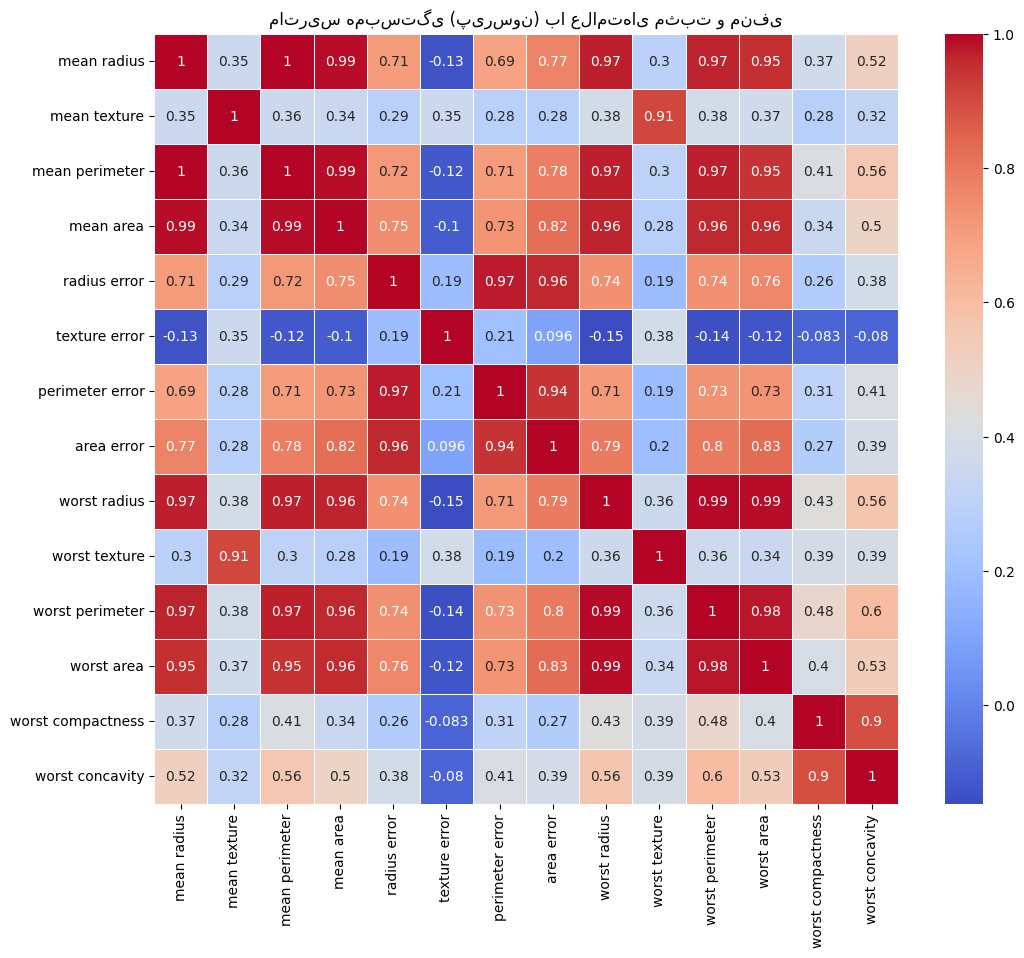

مقادیر ROC AUC هر فیچر:
mean radius: 0.9424348375431603
mean texture: 0.7882451611497783
mean perimeter: 0.9524937642279079
mean area: 0.9426908037338387
radius error: 0.867284253177793
texture error: 0.5036870023636028
perimeter error: 0.8721748412465009
area error: 0.9281225152218192
worst radius: 0.9736572667167707
worst texture: 0.7931303031293229
worst perimeter: 0.9780794911174285
worst area: 0.9728294611639382
worst compactness: 0.8885621235390866
worst concavity: 0.9356326721781089
حذف 'mean radius' به دلیل همبستگی زیاد با 'mean perimeter' (ROC AUC: 0.9424348375431603 < 0.9524937642279079)
حذف 'mean area' به دلیل همبستگی زیاد با 'mean perimeter' (ROC AUC: 0.9426908037338387 < 0.9524937642279079)
حذف 'radius error' به دلیل همبستگی زیاد با 'perimeter error' (ROC AUC: 0.867284253177793 < 0.8721748412465009)
حذف 'perimeter error' به دلیل همبستگی زیاد با 'area error' (ROC AUC: 0.8721748412465009 < 0.9281225152218192)
حذف 'mean perimeter' به دلیل همبستگی زیاد با 'worst radius' (ROC A

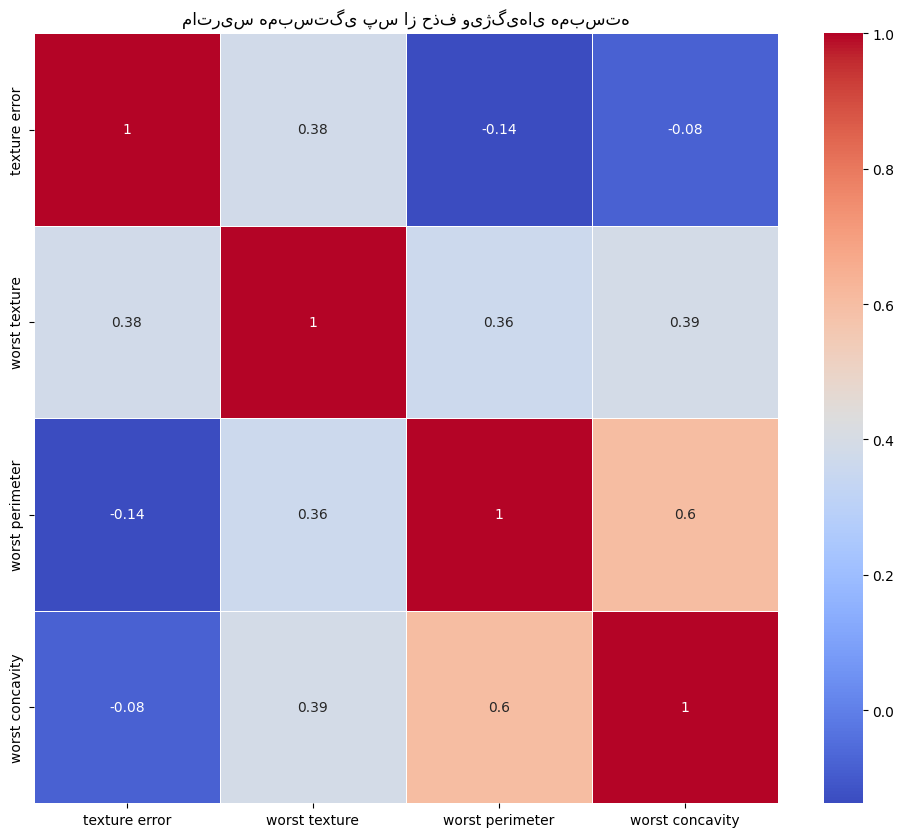

ابعاد نهایی داده ویژگی‌ها: (606, 4)
   texture error  worst texture  worst perimeter  worst concavity
0          1.256          26.40           166.10          0.41070
1          1.532          28.46            84.53          0.03619
2          1.354          28.39           108.10          0.37790
3          1.492          33.17           100.20          0.13260
4          1.045          20.14            87.64          0.15140


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

# ==========================================
# Step 1: Encode Targets for AUC Calculation
# ==========================================
# ROC AUC requires numeric labels. We encode the target variable Y.
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(Y) # Ensure Y is y_train

# ==========================================
# Step 2: Calculate Correlation Matrix
# ==========================================
# We calculate the Pearson correlation coefficient to identify linear relationships.
# High absolute correlation indicates redundant features.
corr_matrix = X.corr(method='pearson') # Ensure X is x_train

# Visualization: Initial Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Initial Pearson Correlation Matrix")
plt.show()

# ==========================================
# Step 3: Calculate Univariate ROC AUC Scores
# ==========================================
# This score acts as a "quality metric" for each feature.
# We will use this to decide which feature to KEEP when two features are highly correlated.
auc_dict = {}
for feature in X.columns:
    try:
        # Calculate AUC for the single feature against the target
        auc = roc_auc_score(y_encoded, X[feature])
        
        # Handle Inverse Correlations:
        # If AUC < 0.5, it means the feature is negatively correlated with the target.
        # We invert it (1 - AUC) because we care about the "strength" of prediction, not the direction.
        # e.g., AUC of 0.2 is as powerful as 0.8.
        if auc < 0.5:
            auc = 1 - auc
        auc_dict[feature] = auc
    except Exception as e:
        # Fallback: If calculation fails (e.g., constant feature), assign a neutral score.
        auc_dict[feature] = 0.5

print("Univariate ROC AUC scores per feature:")
for feat, auc in auc_dict.items():
    print(f"{feat}: {auc:.4f}")

# ==========================================
# Step 4: Remove Correlated Features based on AUC
# ==========================================
threshold = 0.8  # Threshold for high correlation (can be adjusted)
features = X.columns.tolist()
features_to_remove = set()

# Iterate through the correlation matrix to find pairs
for i in range(len(features)):
    for j in range(i):
        # Optimization: Skip if one of the features is already marked for removal
        if features[i] in features_to_remove or features[j] in features_to_remove:
            continue
        
        # Check the absolute correlation value
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            # TIE-BREAKER LOGIC:
            # Compare the AUC scores of the two correlated features.
            auc_i = auc_dict[features[i]]
            auc_j = auc_dict[features[j]]
            
            # Remove the feature with the LOWER AUC score (less predictive power)
            if auc_i < auc_j:
                features_to_remove.add(features[i])
                print(f"Dropping '{features[i]}' (High correlation with '{features[j]}', Lower AUC: {auc_i:.3f} < {auc_j:.3f})")
            else:
                features_to_remove.add(features[j])
                print(f"Dropping '{features[j]}' (High correlation with '{features[i]}', Lower AUC: {auc_j:.3f} < {auc_i:.3f})")

print(f"\nTotal features to remove: {len(features_to_remove)}")
print("Features removed:", features_to_remove)

# ==========================================
# Step 5: Create Reduced Dataset & Re-evaluate
# ==========================================
# Drop the identified redundant features
x_reduced = X.drop(columns=list(features_to_remove))

# Calculate the new correlation matrix to verify redundancy reduction
corr_matrix_reduced = x_reduced.corr(method='pearson')

# Visualization: Final Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_reduced, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Removing Redundant Features")
plt.show()

print("Final feature set shape:", x_reduced.shape)
print(x_reduced.head())

In [12]:
df.drop(columns=list(features_to_remove), axis=1, inplace=True)  # Apply the same feature removal to the test dataset


print(f"Correlated features removed: {list(features_to_remove)}") # This will print the list of features that were removed due to high correlation.
print("Final training shape:", df.shape) # Final shape of the training dataset after feature removal

Correlated features removed: ['radius error', 'area error', 'perimeter error', 'worst compactness', 'mean radius', 'mean perimeter', 'mean texture', 'worst area', 'mean area', 'worst radius']
Final training shape: (483, 6)


In [13]:
df_t.drop(columns=list(features_to_remove), axis=1, inplace=True)  # Apply the same feature removal to the test dataset


print(f"Correlated features removed: {list(features_to_remove)}") # This will print the list of features that were removed due to high correlation.
print("Final training shape:", df_t.shape) # Final shape of the training dataset after feature removal

Correlated features removed: ['radius error', 'area error', 'perimeter error', 'worst compactness', 'mean radius', 'mean perimeter', 'mean texture', 'worst area', 'mean area', 'worst radius']
Final training shape: (86, 5)


# **Define x and y**

In [14]:
df

,texture error,worst texture,worst perimeter,worst concavity,target,diagnosis
564,1.256,26.40,166.10,0.41070,0,Malignant
334,1.532,28.46,84.53,0.03619,1,Benign
448,1.354,28.39,108.10,0.37790,1,Benign
560,1.492,33.17,100.20,0.13260,1,Benign
401,1.045,20.14,87.64,0.15140,1,Benign
...,...,...,...,...,...,...
300,1.161,26.24,171.10,0.61210,0,Malignant
509,1.961,36.33,117.70,0.59110,0,Malignant
230,0.679,24.89,133.50,0.50180,0,Malignant
495,1.636,28.48,103.90,0.17000,1,Benign


In [ ]:
# Defining X and Y for both train and test datasets
X = df.iloc[:,0:-2] 
X = pd.DataFrame(X) # Making sure X is a DataFrame

X_t = df_t.iloc[:,0:-1] 
X_t = pd.DataFrame(X_t) # Making sure X_t is a DataFrame


Y = df.loc[:, 'target']
Y = pd.DataFrame(Y) # Making sure Y is a DataFrame

Y_t = df_t.loc[:, 'target']
Y_t = pd.DataFrame(Y_t) # Making sure Y_t is a DataFrame


X.columns = X.columns.astype(str) # Ensuring that the column names of X are strings

print(X.shape, Y.shape) # Printing the shapes of X and Y to verify their dimensions
print(X_t.shape, Y_t.shape) # Printing the shapes of X_t and Y_t to verify their dimensions
#print(Y)
print(X) # Printing the X DataFrame to verify its contents

(483, 4) (483, 1)
(86, 4) (86, 1)
     texture error  worst texture  worst perimeter  worst concavity
564          1.256          26.40           166.10          0.41070
334          1.532          28.46            84.53          0.03619
448          1.354          28.39           108.10          0.37790
560          1.492          33.17           100.20          0.13260
401          1.045          20.14            87.64          0.15140
..             ...            ...              ...              ...
300          1.161          26.24           171.10          0.61210
509          1.961          36.33           117.70          0.59110
230          0.679          24.89           133.50          0.50180
495          1.636          28.48           103.90          0.17000
287          0.469          15.54            87.40          0.11860

[483 rows x 4 columns]


# **LASSO and Rad score calculation**

In [ ]:
# In this project, the Rad score does not have any sense because there is not any radiomics features, but the code will be kept for future use when radiomics features are available.

import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import QuantileTransformer

# --- Scaling ---
cols = X.columns  # original column names
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()

# For the training set:
X_scaled_array = scaler1.fit_transform(X)
X_test_scaled_array = scaler1.transform(X_t)
X = pd.DataFrame(X_scaled_array, index=X.index, columns=cols)
X_t = pd.DataFrame(X_test_scaled_array, index=X_t.index, columns=cols)


n_splits = 15
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)


# --- LASSO ---
# Define a refined grid of candidate alphas (λ values)
candidate_alphas = np.logspace(-6, 0, 100)

# Create the LassoCV object with optimized parameters
lasso_cv = LassoCV(alphas=candidate_alphas,
                     cv=cv,             # 10-fold cross-validation
                     max_iter=10000,    # Increase if convergence is an issue
                     tol=0.001,         # Convergence tolerance
                     random_state=42)   # For reproducibility

# Fit LassoCV on the scaled training data
lasso_cv.fit(X, Y)
mse_path = lasso_cv.mse_path_
mean_mse = np.mean(mse_path, axis=1)
optimal_idx = np.argmin(mean_mse)
best_alpha = lasso_cv.alphas_[optimal_idx]

# Now fit the LASSO model using the best alpha (alpha can be selected manually either)
lasso = Lasso(alpha = best_alpha, random_state=42).fit(X, Y)

# --- Feature Selection using LASSO ---
# Use SelectFromModel to select features with nonzero coefficients
model = SelectFromModel(lasso, prefit=True)
X_lasso_selected = model.transform(X)         # Training data (selected features)


# Extract the boolean mask for selected features and then the column names
mask = model.get_support()
selected_features = X.columns[mask]

# Reassemble the selected features into DataFrames using the preserved column names
df_selected_features = pd.DataFrame(X_lasso_selected, index=X.index, columns=selected_features)


# --- Compute Radiomics Score --- ** USE IT WHEN YOU HAVE RADIOMICS FEATURES, OTHERWISE, YOU CAN COMMENT THIS PART OUT ---
# Get the intercept and the nonzero coefficients corresponding to the selected features
intercept = lasso.intercept_
selected_coefficients = lasso.coef_[mask]  # Only nonzero coefficients

# Calculate weighted sum (Radiomics score) for training and test sets
Rad_score_train = np.dot(df_selected_features.values, selected_coefficients) + intercept

# Convert the Radiomics Scores to DataFrames for readability
Rad_score_train_df = pd.DataFrame(Rad_score_train, index=X.index, columns=['Radiomics Score'])

X = df_selected_features
X_t = X_t[selected_features]  # Ensure test set has the same selected features


# --- Print Results ---
print("\nTraining Set Radiomics Scores:")
print(Rad_score_train_df.head())
print(f'\nNumber of selected features: {df_selected_features.shape[1]}')
print('')
print("Selected feature names:", list(df_selected_features.columns))
print('')
print("Training data shape (original scaled):", X.shape)
print('')
print("Best alpha:", best_alpha)



Training Set Radiomics Scores:
     Radiomics Score
564         0.044430
334         0.914056
448         0.521500
560         0.673755
401         0.917817

Number of selected features: 3

Selected feature names: ['worst texture', 'worst perimeter', 'worst concavity']

Training data shape (original scaled): (483, 3)

Best alpha: 0.006579332246575682


# AdaBoost model

In [17]:
### GRID SEARCH ###


# setting the cross validation
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()


n_splits = 10
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)

X_train = X.values
X_train = scaler2.fit_transform(X_train)
Y_train = Y.values
Y_train = Y_train.ravel()


X_test = X_t.values
X_test = scaler2.transform(X_test)
Y_test = Y_t.values
Y_test = Y_test.ravel()


# List of parameters for Decision Tree
parameters_DT = ({'random_state':[42], 'criterion':['gini', 'entropy', 'log_loss'], 'splitter':['best', 'random'], 'max_depth':[10, 20, 30, 40], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4]})


model_DT = DecisionTreeClassifier()

In [18]:
gs_DT = GridSearchCV(estimator=model_DT, param_grid=parameters_DT, cv=cv, scoring='accuracy')
gs_DT.fit(X_train, Y_train)
print(gs_DT.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}


In [19]:
parameters_ADB = ({'estimator':[DecisionTreeClassifier(random_state=42, criterion=gs_DT.best_params_['criterion'], max_depth=gs_DT.best_params_['max_depth'], min_samples_leaf=gs_DT.best_params_['min_samples_leaf'], min_samples_split=gs_DT.best_params_['min_samples_split'], splitter=gs_DT.best_params_['splitter'])], 'random_state':[42],'n_estimators':[50, 100, 200], 'random_state':[42], 'learning_rate':[0.1, 0.5, 1.0], 'algorithm':['SAMME', 'SAMME.R']})
model_ADB = AdaBoostClassifier(estimator=DecisionTreeClassifier())


gs_ADB = GridSearchCV(estimator=model_ADB, param_grid=parameters_ADB, cv=cv, scoring='accuracy')
gs_ADB.fit(X_train, Y_train)
print(gs_ADB.best_params_)

{'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42,
                       splitter='random'), 'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 42}


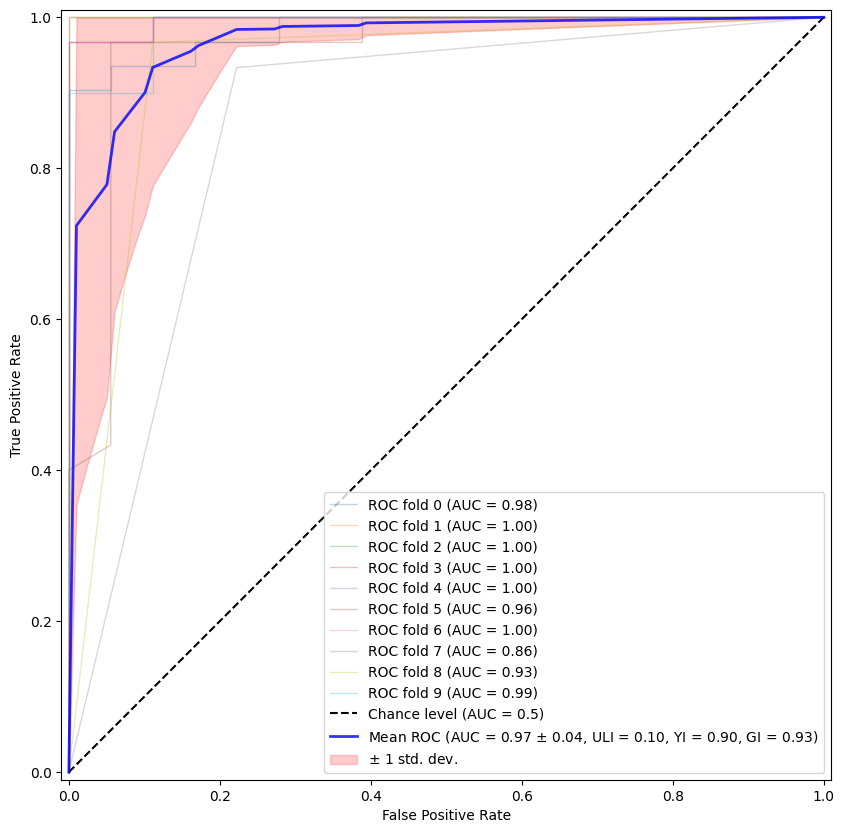

acc: 0.9585921325051759
spec: 0.9555555555555556
pc : 0.9732441471571907
f1 : 0.9667774086378738
sen: 0.9603960396039604


In [20]:
def calc_ULI(Y_test, proba_ADB):
  ulis = []
  fpr, tpr, threshold = roc_curve(Y_test, proba_ADB)
  for i in range(len(fpr)):
    side = ((tpr[i]-1)**2 + (fpr[i]**2))**(1/2)
    ulis.append(side)
  return min(ulis)

def ULI_threshold(Y_test, proba_ADB):
  uli_list = []
  uli = 2
  fpr, tpr, threshold = roc_curve(Y_test, proba_ADB)
  for i in range(len(fpr)):
    side = np.sqrt((tpr[i]-1)**2 + (fpr[i]**2))
    uli_list.append(side)
    if side < uli:
      uli = side
  min_uli = min(uli_list)
  min_index = uli_list.index(min_uli)
  return fpr[min_index], tpr[min_index], threshold[min_index]

def calc_YI(Y_test, proba_ADB):
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_ADB)
    for i in range(len(fpr)):
        side = (tpr[i]-fpr[i])
        ulis.append(side)
    return round(max(ulis), 3)



# Defining lists in order to store confusion matrix values
cm_ADB_TP = []
cm_ADB_FP = []
cm_ADB_TN = []
cm_ADB_FN = []

# ROC related lists and variables
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(10, 10))


for fold, (train_index, test_index) in enumerate(cv.split(X_train, Y_train)):
    x_train, x_test = X_train[train_index, :], X_train[test_index, :]
    y_train, y_test = Y_train[train_index], Y_train[test_index]


    # Initialize and Fit
    model_ADB = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            random_state=42, 
            criterion=gs_DT.best_params_['criterion'], 
            max_depth=gs_DT.best_params_['max_depth'], 
            min_samples_leaf=gs_DT.best_params_['min_samples_leaf'], 
            min_samples_split=gs_DT.best_params_['min_samples_split'], 
            splitter=gs_DT.best_params_['splitter']
        ), 
        random_state=42, 
        learning_rate=gs_ADB.best_params_['learning_rate'], 
        n_estimators=gs_ADB.best_params_['n_estimators'], 
        algorithm=gs_ADB.best_params_['algorithm']
    )
    model_ADB.fit(x_train, y_train)

    y_pred_ADB = model_ADB.predict_proba(x_test)[:,1]

    ULI_1 = calc_ULI(y_test, y_pred_ADB)
    YI_1 = calc_YI(y_test, y_pred_ADB)
    x_roc_1, y_roc_1, thresh_mainADB_b = ULI_threshold(y_test, y_pred_ADB)

    custom_threshold = thresh_mainADB_b
    y_pred_ADB = (y_pred_ADB >= thresh_mainADB_b).astype(int)


    # Calculation of metrics using the total confusion matrix ( sum of all folds all together )
    cm_ADB = confusion_matrix(y_test, y_pred_ADB)

    TN = cm_ADB[0,0]
    cm_ADB_TN.append(TN)
    TN_t = np.sum(cm_ADB_TN)
    FP = cm_ADB[0,1]
    cm_ADB_FP.append(FP)
    FP_t = np.sum(cm_ADB_FP)
    TP = cm_ADB[1,1]
    cm_ADB_TP.append(TP)
    TP_t = np.sum(cm_ADB_TP)
    FN = cm_ADB[1,0]
    cm_ADB_FN.append(FN)
    FN_t = np.sum(cm_ADB_FN)



    # Performance metrics
    sensitivity = TP_t / (TP_t + FN_t)
    specificity = TN_t / (TN_t + FP_t)
    precission = TP_t / (TP_t + FP_t)
    accuracy = (TP_t + TN_t) / (TP_t + TN_t + FP_t + FN_t)
    F1 = 2 * (precission * sensitivity) / (precission + sensitivity)


    # ROC curve and AUC score
    viz = RocCurveDisplay.from_estimator(
        model_ADB,
        x_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )

    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)



mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f, ULI = %0.2f, YI = %0.2f, GI = %0.2f)" % (mean_auc, std_auc, ULI_1, YI_1, 2*(mean_auc-0.5)),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)


ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",

)
ax.legend(loc="lower right")
plt.show()



print(f'acc: {accuracy}')
print(f'spec: {specificity}')
print(f'pc : {precission}')
print(f'f1 : {F1}')
print(f'sen: {sensitivity}')

In [21]:
# Predicting the test set

# Probability prediction of LR
proba_ADB = model_ADB.predict_proba(X_test)[:, 1]

# Logical prediction of LR
prob_ADB_SIMPLE = model_ADB.predict(X_test)

print(model_ADB.predict(X_test))
print(model_ADB.predict_proba(X_test)[:,0])

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1]
[0.85916025 0.86493138 0.88079708 0.11920292 0.88079708 0.11920292
 0.6528482  0.83142253 0.85543234 0.13192193 0.84964674 0.87081379
 0.14147088 0.16380302 0.84919072 0.11920292 0.12632419 0.11920292
 0.50416997 0.17036845 0.88079708 0.84331633 0.88079708 0.88079708
 0.22572031 0.11920292 0.11920292 0.35353811 0.11920292 0.22391595
 0.85543234 0.11920292 0.32762662 0.13580137 0.87666171 0.88079708
 0.11920292 0.11920292 0.87164258 0.26512187 0.11920292 0.19464437
 0.11920292 0.87555223 0.85908289 0.87666171 0.42842164 0.17204582
 0.88079708 0.12714257 0.11920292 0.83362857 0.88079708 0.15052749
 0.11920292 0.15846644 0.88079708 0.8509139  0.13701778 0.17651964
 0.36175701 0.11920292 0.16046914 0.82549628 0.31897121 0.11920292
 0.11920292 0.11920292 0.16201435 0.12670771 0.11920292 0.24871039
 0.14730716 0.870016

In [22]:
# Predictions based on optimum threshold
# Instead of custom threshold (which is the optimum threshold for test dataset), thresh_main1 is being used which is the threshold for train dataset
predictions_ADB = (proba_ADB >= thresh_mainADB_b).astype(int)
print(predictions_ADB)

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 1]


spec: 1.0
acc: 0.9069767441860465
pc : 1.0
f1 : 0.92
AUC: 0.9259259259259259
sen: 0.8518518518518519


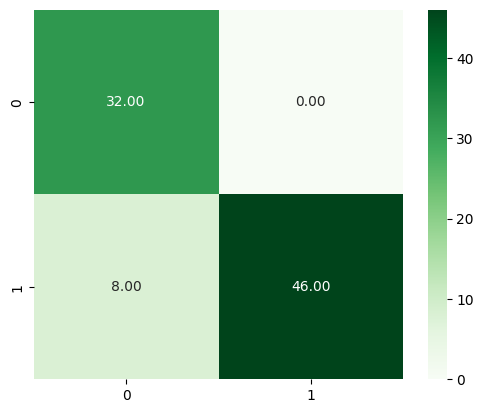

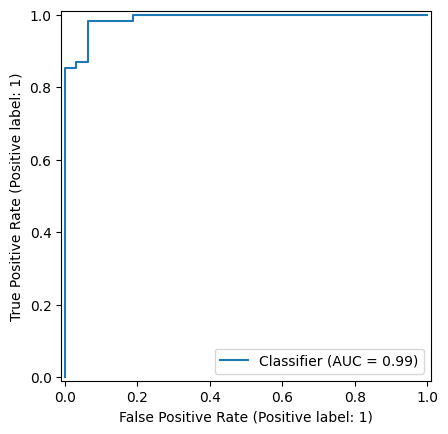

In [23]:
# Metrics for the test --> LR ( Thresholded probability )
cm = confusion_matrix(Y_test, predictions_ADB)
acc = accuracy_score(Y_test, predictions_ADB)
pc = precision_score(Y_test, predictions_ADB)
f1 = f1_score(Y_test, predictions_ADB)
AUC = roc_auc_score(Y_test, predictions_ADB)
sen = recall_score(Y_test, predictions_ADB)
TN = cm[0,0]
FP = cm[0,1]
spec = TN/(TN+FP)
print(F'spec: {spec}')
print(f'acc: {acc}')
print(f'pc : {pc}')
print(f'f1 : {f1}')
print(f'AUC: {AUC}')
print(f'sen: {sen}')
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
sns.heatmap(cm_df, square=True, cmap='Greens', annot=True, fmt='.2f')
ROC = RocCurveDisplay.from_predictions(Y_test, proba_ADB)

# LR model

In [24]:
### GRID SEARCH ###


# setting the cross validation
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()

n_splits = 10
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)


# List of parameters for LR
parameters_LR = ({'random_state':[42], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'C':[0.01, 0.1, 0.3, 0.5, 0.7, 1, 3, 5], 'solver':['lbfgs', 'liblinear', 'saga'], 'class_weight':['balanced', 'None'], 'fit_intercept':[True, False]})

model_LR = LogisticRegression()

In [25]:
gs_LR = GridSearchCV(estimator=model_LR, param_grid=parameters_LR, cv=cv, scoring='accuracy')
gs_LR.fit(X_train, Y_train)
print(gs_LR.best_params_)

{'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}


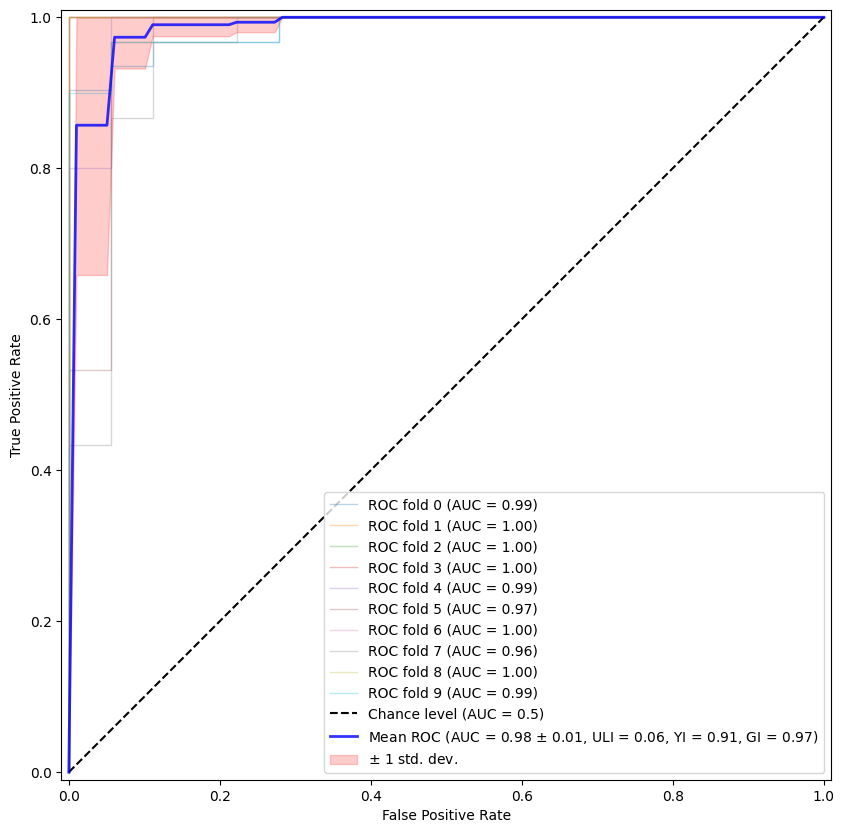

acc: 0.9772256728778468
spec: 0.9666666666666667
pc : 0.9802631578947368
f1 : 0.9818780889621087
sen: 0.9834983498349835


In [ ]:
# ==========================================
# Helper Functions: Threshold Optimization
# ==========================================

def calc_ULI(Y_test, proba_LR):
    """
    Calculates the Unit Less Index (ULI) for all thresholds.
    ULI measures the Euclidean distance from the point (0,1) on the ROC curve.
    Lower ULI indicates better performance (closer to perfect classification).
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_LR)
    for i in range(len(fpr)):
        # Calculate distance to the top-left corner (0, 1)
        side = ((tpr[i]-1)**2 + (fpr[i]**2))**(1/2)
        ulis.append(side)
    return min(ulis) # Return the best (minimum) distance found

def ULI_threshold(Y_test, proba_LR):
    """
    Finds the optimal probability threshold that minimizes the ULI.
    Returns the specific FPR, TPR, and Threshold value corresponding to that point.
    """
    uli_list = []
    uli = 2 # Initialize with a value larger than max possible distance (sqrt(2))
    fpr, tpr, threshold = roc_curve(Y_test, proba_LR)
    
    for i in range(len(fpr)):
        side = np.sqrt((tpr[i]-1)**2 + (fpr[i]**2))
        uli_list.append(side)
        if side < uli:
            uli = side
            
    min_uli = min(uli_list)
    min_index = uli_list.index(min_uli)
    
    # Return the coordinates and threshold of the optimal point
    return fpr[min_index], tpr[min_index], threshold[min_index]

def calc_YI(Y_test, proba_LR):
    """
    Calculates the Youden's Index (YI).
    YI = Sensitivity + Specificity - 1 (or TPR - FPR).
    Maximize YI to find the optimal cut-off point.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_LR)
    for i in range(len(fpr)):
        side = (tpr[i]-fpr[i]) # Equivalent to Sensitivity + Specificity - 1
        ulis.append(side)
    return round(max(ulis), 3)

# ==========================================
# Initialization
# ==========================================

# Lists to aggregate Confusion Matrix counts across all K-folds
cm_LR_TP = []
cm_LR_FP = []
cm_LR_TN = []
cm_LR_FN = []

# Lists to store ROC curve data for plotting the Mean ROC later
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # Standardized x-axis for averaging ROC curves

fig, ax = plt.subplots(figsize=(10, 10))

# ==========================================
# Cross-Validation Loop
# ==========================================
# We iterate through each fold defined by the 'cv' splitter (StratifiedKFold)
for fold, (train_index, test_index) in enumerate(cv.split(X_train, Y_train)):
    
    # 1. Split Data for this Fold
    # X_train and Y_train here refer to the entire training set passed to CV
    x_train, x_test = X_train[train_index, :], X_train[test_index, :]
    y_train, y_test = Y_train[train_index], Y_train[test_index]

    # 2. Train Logistic Regression Model
    # Uses best hyperparameters found previously via GridSearchCV (gs_LR)
    model_LR = LogisticRegression(
        random_state=42, 
        C=gs_LR.best_params_['C'], 
        class_weight=gs_LR.best_params_['class_weight'], 
        fit_intercept=gs_LR.best_params_['fit_intercept'], 
        penalty=gs_LR.best_params_['penalty'], 
        solver=gs_LR.best_params_['solver'] 
    )
    model_LR.fit(x_train, y_train)

    # 3. Predict Probabilities
    # We need probabilities (not hard labels) to calculate ROC and find thresholds
    y_pred_LR = model_LR.predict_proba(x_test)[:,1]

    # 4. Calculate Threshold & Optimization Metrics
    ULI_1 = calc_ULI(y_test, y_pred_LR)
    YI_1 = calc_YI(y_test, y_pred_LR)
    
    # Find the specific threshold that minimizes distance to perfect classification
    x_roc_1, y_roc_1, thresh_mainLR_b = ULI_threshold(y_test, y_pred_LR)

    # 5. Apply Optimal Threshold
    # Instead of default 0.5, we use the ULI-optimized threshold for hard classification
    custom_threshold = thresh_mainLR_b
    y_pred_hard = (y_pred_LR >= thresh_mainLR_b).astype(int) # Renamed to avoid confusion with probas

    # 6. Confusion Matrix & Accumulation
    # Compute CM for this specific fold
    cm_LR = confusion_matrix(y_test, y_pred_hard)

    # Extract and store components (TP, FP, TN, FN)
    TN = cm_LR[0,0]
    cm_LR_TN.append(TN)
    FP = cm_LR[0,1]
    cm_LR_FP.append(FP)
    TP = cm_LR[1,1]
    cm_LR_TP.append(TP)
    FN = cm_LR[1,0]
    cm_LR_FN.append(FN)

    # Calculate Cumulative Sums (Total counts across all folds processed so far)
    # NOTE: These variables update in every loop iteration
    TN_t = np.sum(cm_LR_TN)
    FP_t = np.sum(cm_LR_FP)
    TP_t = np.sum(cm_LR_TP)
    FN_t = np.sum(cm_LR_FN)

    # 7. Calculate Cumulative Performance Metrics
    # These metrics represent the weighted average performance across folds up to this point
    sensitivity = TP_t / (TP_t + FN_t)
    specificity = TN_t / (TN_t + FP_t)
    precission = TP_t / (TP_t + FP_t)
    accuracy = (TP_t + TN_t) / (TP_t + TN_t + FP_t + FN_t)
    F1 = 2 * (precission * sensitivity) / (precission + sensitivity)

    # 8. Plot ROC Curve for this Fold
    viz = RocCurveDisplay.from_estimator(
        model_LR,
        x_test, # Note: .from_estimator() uses the model to predict internally
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1), # Only plot chance line on last fold
    )

    # Interpolate TPR to allow averaging later
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# ==========================================
# Final Aggregated Plotting
# ==========================================

# Calculate Mean ROC Curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0 # Ensure curve ends at (1,1)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot Mean ROC
# Note: ULI_1 and YI_1 in the label will only show the value from the *last fold* loop
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f, ULI = %0.2f, YI = %0.2f, GI = %0.2f)" % (mean_auc, std_auc, ULI_1, YI_1, 2*(mean_auc-0.5)),
    lw=2,
    alpha=0.8,
)

# Plot Standard Deviation Shade (Confidence Interval)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

# ==========================================
# Final Metrics Printout
# ==========================================
# These print the cumulative metrics calculated after the FINAL fold
print(f'acc: {accuracy}')
print(f'spec: {specificity}')
print(f'pc : {precission}')
print(f'f1 : {F1}')
print(f'sen: {sensitivity}')

In [27]:
# Predicting the test set

# Probability prediction of LR
proba_LR = model_LR.predict_proba(X_test)[:, 1]

# Logical prediction of LR
prob_LR_SIMPLE = model_LR.predict(X_test)

print(model_LR.predict(X_test))
print(model_LR.predict_proba(X_test)[:,0])

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 1]
[9.26021156e-01 9.74305608e-01 9.99527538e-01 1.43034256e-03
 9.99974695e-01 6.90100225e-02 5.36970040e-01 9.06854790e-01
 9.91138895e-01 1.08635614e-01 9.99981073e-01 9.97640737e-01
 1.36702960e-03 2.58391554e-01 8.46709535e-01 5.09149354e-02
 7.44296667e-02 9.53587911e-03 5.47777385e-01 6.03044353e-02
 9.99999812e-01 9.95803924e-01 9.55613105e-01 9.99739659e-01
 1.99099296e-01 1.08918291e-02 5.37457249e-04 3.36139513e-01
 6.24179688e-03 8.95915101e-02 9.98167674e-01 2.04253698e-04
 2.70060206e-01 7.28571693e-03 9.99729385e-01 9.67907468e-01
 5.19463602e-02 3.19507685e-04 9.97297932e-01 3.67717113e-01
 1.56639422e-02 4.05716042e-01 5.80185869e-03 9.13773229e-01
 9.88432778e-01 9.99949001e-01 3.82425890e-01 2.95426859e-03
 9.99999997e-01 6.94095686e-02 1.50651041e-02 9.06597147e-01
 9.99999670e-01 6.87966721e-02 

In [ ]:
# Predictions based on optimum threshold (Threshold optimized on the TRAINING set)
predictions_LR = (proba_LR >= thresh_mainLR_b).astype(int)
print(predictions_LR)

[0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 0 1]


spec: 0.9375
acc: 0.9534883720930233
pc : 0.9629629629629629
f1 : 0.9629629629629629
AUC: 0.9502314814814814
sen: 0.9629629629629629


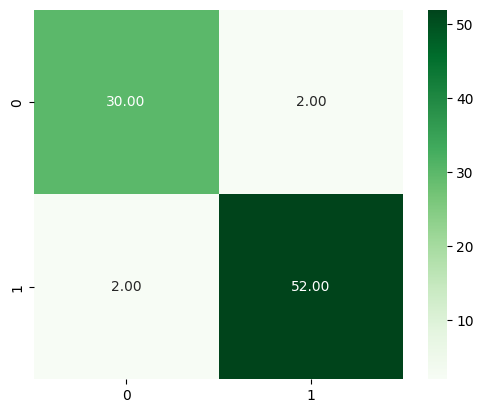

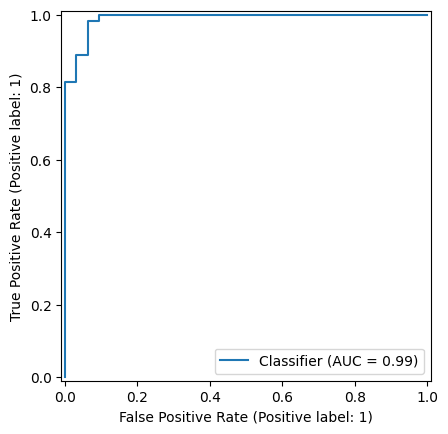

In [29]:
# Metrics for the test --> LR ( Thresholded probability )
cm = confusion_matrix(Y_test, predictions_LR)
acc = accuracy_score(Y_test, predictions_LR)
pc = precision_score(Y_test, predictions_LR)
f1 = f1_score(Y_test, predictions_LR)
AUC = roc_auc_score(Y_test, predictions_LR)
sen = recall_score(Y_test, predictions_LR)
TN = cm[0,0]
FP = cm[0,1]
spec = TN/(TN+FP)
print(F'spec: {spec}')
print(f'acc: {acc}')
print(f'pc : {pc}')
print(f'f1 : {f1}')
print(f'AUC: {AUC}')
print(f'sen: {sen}')
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
sns.heatmap(cm_df, square=True, cmap='Greens', annot=True, fmt='.2f')
ROC = RocCurveDisplay.from_predictions(Y_test, proba_LR)

# SVC model

In [30]:
### GRID SEARCH ###


# setting the cross validation
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()

n_splits = 10
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)



# List of parameters for SVC
parameters_SVC = ({'random_state':[42], 'C':[0.5, 2, 4, 10, 20], 'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'gamma':['auto', 'scale']})


model_SVC = SVC()

In [31]:
gs_SVC = GridSearchCV(estimator=model_SVC, param_grid=parameters_SVC, cv=cv, scoring='accuracy')
gs_SVC.fit(X_train, Y_train)
print(gs_SVC.best_params_)

{'C': 10, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 42}


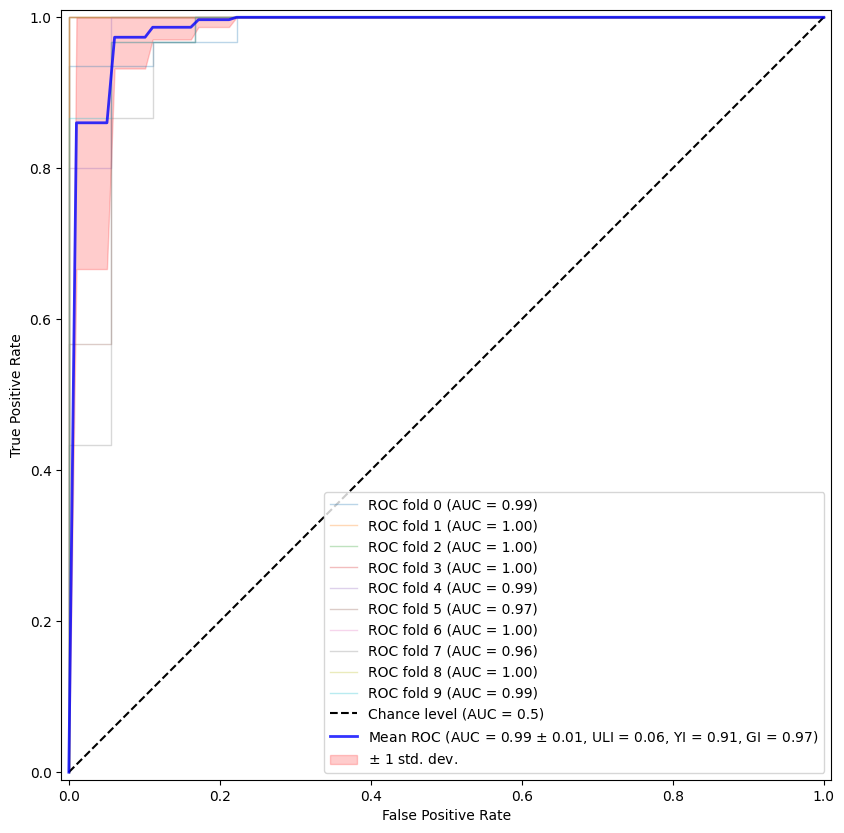

acc: 0.979296066252588
spec: 0.9722222222222222
pc : 0.9834983498349835
f1 : 0.9834983498349835
sen: 0.9834983498349835


In [ ]:
# ==========================================
# Helper Functions: Threshold Optimization
# ==========================================

def calc_ULI(Y_test, proba_SVC):
    """
    Calculates the Unit Less Index (ULI) for all possible thresholds.
    The ULI measures the Euclidean distance from a point on the ROC curve 
    to the ideal classification point (0, 1) [Top-Left corner].
    A lower ULI indicates a better balance between Sensitivity and Specificity.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_SVC)
    for i in range(len(fpr)):
        # Calculate Euclidean distance to (0, 1)
        side = ((tpr[i]-1)**2 + (fpr[i]**2))**(1/2)
        ulis.append(side)
    return min(ulis) # Return the minimum distance found (Best theoretical performance)

def ULI_threshold(Y_test, proba_SVC):
    """
    Identifies the specific probability threshold that minimizes the ULI.
    Returns the False Positive Rate (FPR), True Positive Rate (TPR), and 
    the actual probability threshold value at that optimal point.
    """
    uli_list = []
    uli = 2 # Initialize with a value larger than max possible distance (sqrt(2) ≈ 1.414)
    fpr, tpr, threshold = roc_curve(Y_test, proba_SVC)
    
    for i in range(len(fpr)):
        side = np.sqrt((tpr[i]-1)**2 + (fpr[i]**2))
        uli_list.append(side)
        if side < uli:
            uli = side
            
    min_uli = min(uli_list)
    min_index = uli_list.index(min_uli)
    
    # Return optimal coordinates and the threshold to use for classification
    return fpr[min_index], tpr[min_index], threshold[min_index]

def calc_YI(Y_test, proba_SVC):
    """
    Calculates Youden's Index (YI).
    YI = Sensitivity + Specificity - 1.
    This metric captures the maximum vertical distance between the ROC curve 
    and the diagonal chance line. Higher is better.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_SVC)
    for i in range(len(fpr)):
        side = (tpr[i]-fpr[i])
        ulis.append(side)
    return round(max(ulis), 3)

# ==========================================
# Initialization
# ==========================================

# Lists to aggregate Confusion Matrix counts across all K-folds
# These allow us to calculate "Macro" or "Pooled" performance metrics later
cm_SVC_TP = []
cm_SVC_FP = []
cm_SVC_TN = []
cm_SVC_FN = []

# Lists to store ROC curve data for plotting the Mean ROC later
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # Standardized x-axis (FPR) for averaging ROC curves

fig, ax = plt.subplots(figsize=(10, 10))

# ==========================================
# Cross-Validation Loop
# ==========================================
# We iterate through each fold defined by the 'cv' splitter (StratifiedKFold)
for fold, (train_index, test_index) in enumerate(cv.split(X_train, Y_train)):
    
    # 1. Split Data for this Fold
    # X_train and Y_train here refer to the global training set passed to CV
    x_train, x_test = X_train[train_index, :], X_train[test_index, :]
    y_train, y_test = Y_train[train_index], Y_train[test_index]

    # 2. Configure & Train SVC Model
    # We initialize SVC with best hyperparameters found via GridSearchCV (gs_SVC).
    # 'probability=True' is CRITICAL here to enable .predict_proba() for ROC calculation.
    model_SVC = SVC(
        random_state=42, 
        C=gs_SVC.best_params_['C'], 
        kernel=gs_SVC.best_params_['kernel'], 
        gamma=gs_SVC.best_params_['gamma'], 
        probability=True
    )
    model_SVC.fit(x_train, y_train)

    # 3. Predict Probabilities
    # We extract probabilities for the positive class (index 1)
    y_pred_SVC = model_SVC.predict_proba(x_test)[:,1]

    # 4. Calculate Optimization Metrics (ULI, YI) for this fold
    # These metrics help assess how "confident" the model is in its best-case scenario
    ULI_1 = calc_ULI(y_test, y_pred_SVC)
    YI_1 = calc_YI(y_test, y_pred_SVC)
    
    # Find the specific threshold that optimizes performance (minimizes ULI)
    x_roc_1, y_roc_1, thresh_mainSVC_b = ULI_threshold(y_test, y_pred_SVC)

    # 5. Apply Optimal Threshold for Classification
    # Instead of the default 0.5 threshold, we classify based on the ULI-optimized threshold
    custom_threshold = thresh_mainSVC_b
    y_pred_hard = (y_pred_SVC >= thresh_mainSVC_b).astype(int) # Renamed variable for clarity

    # 6. Confusion Matrix & Accumulation
    # Compute CM for this specific fold using the optimized predictions
    cm_SVC = confusion_matrix(y_test, y_pred_hard)

    # Extract components (TP, FP, TN, FN)
    TN = cm_SVC[0,0]
    cm_SVC_TN.append(TN)
    FP = cm_SVC[0,1]
    cm_SVC_FP.append(FP)
    TP = cm_SVC[1,1]
    cm_SVC_TP.append(TP)
    FN = cm_SVC[1,0]
    cm_SVC_FN.append(FN)

    # Calculate Cumulative Sums (Total counts across all folds processed so far)
    # These variables update in every loop iteration to track total performance
    TN_t = np.sum(cm_SVC_TN)
    FP_t = np.sum(cm_SVC_FP)
    TP_t = np.sum(cm_SVC_TP)
    FN_t = np.sum(cm_SVC_FN)

    # 7. Calculate Cumulative Performance Metrics
    # These represent the weighted average performance across folds up to this point
    sensitivity = TP_t / (TP_t + FN_t)
    specificity = TN_t / (TN_t + FP_t)
    precission = TP_t / (TP_t + FP_t)
    accuracy = (TP_t + TN_t) / (TP_t + TN_t + FP_t + FN_t)
    F1 = 2 * (precission * sensitivity) / (precission + sensitivity)

    # 8. Plot ROC Curve for this Fold
    viz = RocCurveDisplay.from_estimator(
        model_SVC,
        x_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1), # Only plot the dashed chance line on the last fold
    )

    # Interpolate TPR to allow averaging later
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# ==========================================
# Final Aggregated Plotting
# ==========================================

# Calculate Mean ROC Curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0 # Ensure curve ends at (1, 1)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot Mean ROC
# Note: The label includes ULI and YI from the *last fold* iteration (ULI_1, YI_1). 
# ideally, these should be averaged too, but currently, it shows the last fold's values.
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f, ULI = %0.2f, YI = %0.2f, GI = %0.2f)" % (mean_auc, std_auc, ULI_1, YI_1, 2*(mean_auc-0.5)),
    lw=2,
    alpha=0.8,
)

# Plot Standard Deviation Shade (Confidence Interval)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

# ==========================================
# Final Metrics Printout
# ==========================================
# Print the final cumulative metrics calculated after the last fold
print(f'acc: {accuracy}')
print(f'spec: {specificity}')
print(f'pc : {precission}')
print(f'f1 : {F1}')
print(f'sen: {sensitivity}')

In [33]:
# Predicting the test set

# Probability prediction of SVC
proba_SVC = model_SVC.predict_proba(X_test)[:, 1]

# Logical prediction of SVC
prob_SVC_SIMPLE = model_SVC.predict(X_test)

print(model_SVC.predict(X_test))
print(model_SVC.predict_proba(X_test)[:,0])

[0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 0 1]
[9.41839660e-01 9.88627595e-01 9.99946759e-01 3.93369003e-08
 9.99999116e-01 1.82943917e-02 4.68748805e-01 9.48645191e-01
 9.98098237e-01 5.47782905e-02 9.99999535e-01 9.99273187e-01
 2.79290739e-08 1.94080438e-01 8.70917372e-01 1.37358718e-02
 2.64960626e-02 1.56661317e-05 4.75410919e-01 1.51735705e-02
 9.99999900e-01 9.99296121e-01 9.67803336e-01 9.99981267e-01
 9.81103490e-02 7.93378746e-06 5.49139651e-09 2.51924879e-01
 2.20421782e-06 2.67265587e-02 9.99795314e-01 4.20119193e-10
 1.56750120e-01 2.83954654e-06 9.99974165e-01 9.83205428e-01
 1.71075755e-02 8.70997155e-10 9.99424883e-01 3.20043669e-01
 3.94747091e-03 2.65584631e-01 2.63724662e-06 9.22005939e-01
 9.96857195e-01 9.99997861e-01 1.92131295e-01 2.72184251e-07
 9.99999900e-01 2.95244098e-02 3.05879541e-03 9.17807207e-01
 9.99999900e-01 2.04849891e-02 

In [ ]:
# Predictions based on optimum threshold
# Instead of custom threshold (which is the optimum threshold for test dataset), thresh_mainSVC_b is being used which is the threshold for train dataset
predictions_SVC = (proba_SVC >= thresh_mainSVC_b).astype(int)
print(predictions_SVC)

[0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 0 1]


spec: 0.9375
acc: 0.9534883720930233
pc : 0.9629629629629629
f1 : 0.9629629629629629
AUC: 0.9502314814814814
sen: 0.9629629629629629


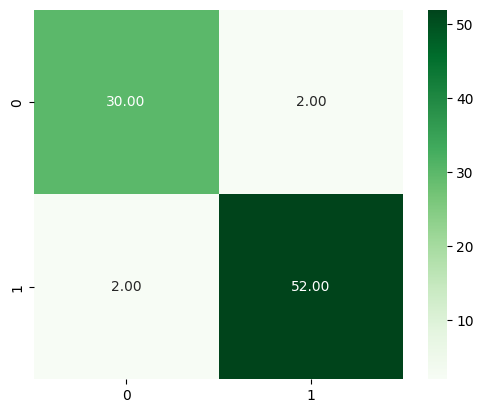

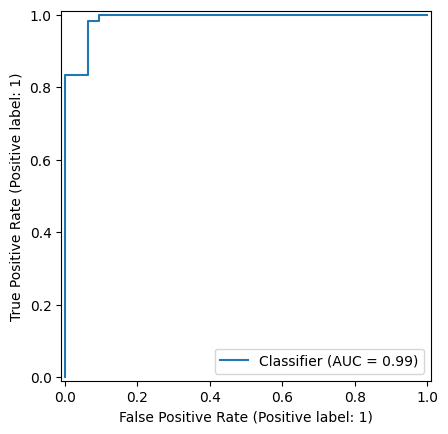

In [35]:
# Metrics for the test --> SVC ( Thresholded probability )
cm = confusion_matrix(Y_test, predictions_SVC)
acc = accuracy_score(Y_test, predictions_SVC)
pc = precision_score(Y_test, predictions_SVC)
f1 = f1_score(Y_test, predictions_SVC)
AUC = roc_auc_score(Y_test, predictions_SVC)
sen = recall_score(Y_test, predictions_SVC)
TN = cm[0,0]
FP = cm[0,1]
spec = TN/(TN+FP)
print(F'spec: {spec}')
print(f'acc: {acc}')
print(f'pc : {pc}')
print(f'f1 : {f1}')
print(f'AUC: {AUC}')
print(f'sen: {sen}')
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
sns.heatmap(cm_df, square=True, cmap='Greens', annot=True, fmt='.2f')
ROC = RocCurveDisplay.from_predictions(Y_test, proba_SVC)

# DT model

In [36]:
### GRID SEARCH ###


# setting the cross validation
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()


n_splits = 10
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)




# List of parameters for Decision Tree
parameters_DT = ({'random_state':[42], 'criterion':['gini', 'entropy', 'log_loss'], 'splitter':['best', 'random'], 'max_depth':[10, 20, 30, 40], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4]})


model_DT = DecisionTreeClassifier()

In [37]:
gs_DT = GridSearchCV(estimator=model_DT, param_grid=parameters_DT, cv=cv, scoring='accuracy')
gs_DT.fit(X_train, Y_train)
print(gs_DT.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}


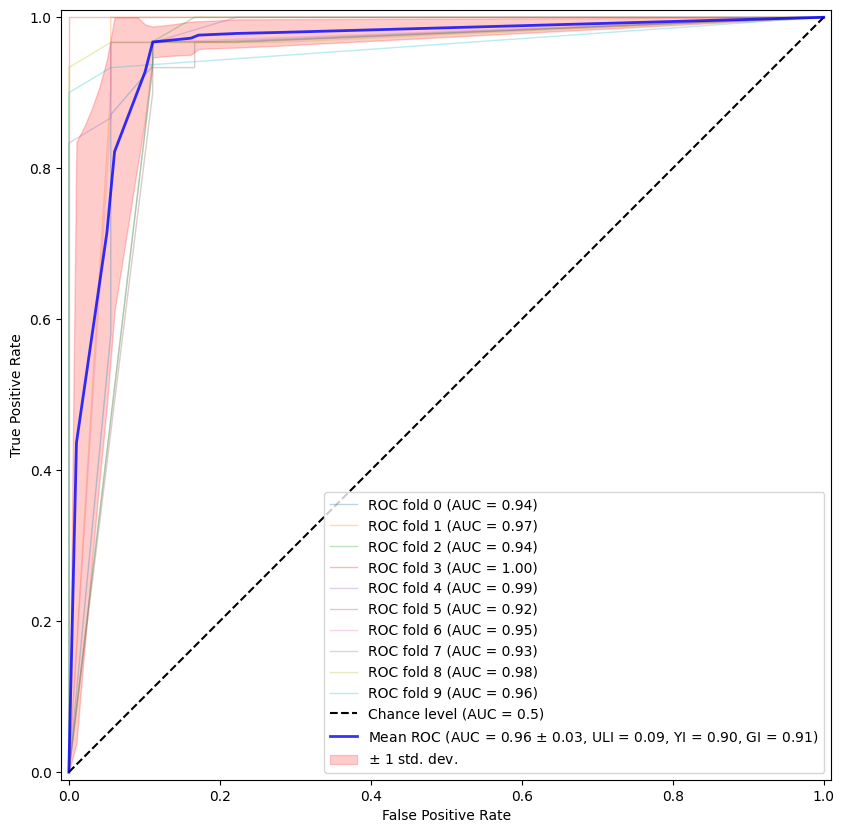

acc: 0.9523809523809523
spec: 0.9277777777777778
pc : 0.9575163398692811
f1 : 0.962233169129721
sen: 0.966996699669967


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, auc
from sklearn import metrics

# ==========================================
# Helper Functions: Threshold Optimization
# ==========================================

def calc_ULI(Y_test, proba_DT):
    """
    Calculates the Unit Less Index (ULI) for all thresholds.
    ULI measures the distance from the perfect classification point (0, 1) on the ROC curve.
    Formula: sqrt((TPR - 1)^2 + FPR^2)
    A value closer to 0 indicates better performance.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_DT)
    for i in range(len(fpr)):
        side = ((tpr[i]-1)**2 + (fpr[i]**2))**(1/2)
        ulis.append(side)
    return min(ulis) # Return the best (minimum) distance found

def ULI_threshold(Y_test, proba_DT):
    """
    Finds the exact probability threshold that minimizes the ULI.
    This threshold balances Sensitivity and Specificity based on the ULI criterion.
    Returns: (FPR, TPR, Optimal Threshold)
    """
    uli_list = []
    uli = 2 # Initialize with a value larger than max possible (sqrt(2))
    fpr, tpr, threshold = roc_curve(Y_test, proba_DT)
    
    for i in range(len(fpr)):
        side = np.sqrt((tpr[i]-1)**2 + (fpr[i]**2))
        uli_list.append(side)
        if side < uli:
            uli = side
            
    min_uli = min(uli_list)
    min_index = uli_list.index(min_uli)
    
    return fpr[min_index], tpr[min_index], threshold[min_index]

def calc_YI(Y_test, proba_DT):
    """
    Calculates Youden's Index (YI).
    YI = Sensitivity + Specificity - 1 (or TPR - FPR).
    It identifies the threshold that maximizes the vertical distance from the chance line.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_DT)
    for i in range(len(fpr)):
        side = (tpr[i]-fpr[i])
        ulis.append(side)
    return round(max(ulis), 3)


# ==========================================
# Initialization
# ==========================================

# Lists to aggregate Confusion Matrix counts across all folds.
# We will sum these up to calculate "Pooled" performance metrics.
cm_DT_TP = []
cm_DT_FP = []
cm_DT_TN = []
cm_DT_FN = []

# Lists to store ROC curve data for averaging later
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # Standardized x-axis for the mean ROC plot

fig, ax = plt.subplots(figsize=(10, 10))

# ==========================================
# Cross-Validation Loop
# ==========================================
# Iterate over each split defined by the Cross-Validator (cv)
for fold, (train_index, test_index) in enumerate(cv.split(X_train, Y_train)):
    
    # 1. Split Data for this Fold
    x_train, x_test = X_train[train_index, :], X_train[test_index, :]
    y_train, y_test = Y_train[train_index], Y_train[test_index]

    # 2. Configure & Train Decision Tree
    # We use hyperparameters from a previous GridSearchCV (gs_DT).
    # Note: 'class_weight="balanced"' is used to handle potential class imbalance automatically.
    model_DT = DecisionTreeClassifier(
        random_state=42, 
        class_weight='balanced', 
        criterion=gs_DT.best_params_['criterion'], 
        max_depth=gs_DT.best_params_['max_depth'], 
        min_samples_leaf=gs_DT.best_params_['min_samples_leaf'], 
        min_samples_split=gs_DT.best_params_['min_samples_split'], 
        splitter=gs_DT.best_params_['splitter']
    )
    model_DT.fit(x_train, y_train)

    # 3. Predict Probabilities
    # Probabilities are needed for ROC calculation and threshold tuning.
    y_pred_DT = model_DT.predict_proba(x_test)[:,1]

    # 4. Calculate Threshold Optimization Metrics
    ULI_1 = calc_ULI(y_test, y_pred_DT)
    YI_1 = calc_YI(y_test, y_pred_DT)
    
    # Identify the optimal threshold for THIS specific fold
    x_roc_1, y_roc_1, thresh_mainDT_b = ULI_threshold(y_test, y_pred_DT)

    # 5. Apply Optimal Threshold
    # Convert probabilities to binary predictions (0 or 1) using the calculated threshold.
    custom_threshold = thresh_mainDT_b
    y_pred_hard = (y_pred_DT >= thresh_mainDT_b).astype(int) # Renamed for clarity

    # 6. Confusion Matrix & Accumulation
    # Calculate CM for the current fold
    cm_DT = confusion_matrix(y_test, y_pred_hard)

    # Store the components (TN, FP, TP, FN)
    TN = cm_DT[0,0]
    cm_DT_TN.append(TN)
    FP = cm_DT[0,1]
    cm_DT_FP.append(FP)
    TP = cm_DT[1,1]
    cm_DT_TP.append(TP)
    FN = cm_DT[1,0]
    cm_DT_FN.append(FN)

    # Update Cumulative Sums (Total counts across all processed folds)
    TN_t = np.sum(cm_DT_TN)
    FP_t = np.sum(cm_DT_FP)
    TP_t = np.sum(cm_DT_TP)
    FN_t = np.sum(cm_DT_FN)

    # 7. Calculate Cumulative Performance Metrics
    # These metrics reflect the "Pooled" performance up to the current fold.
    sensitivity = TP_t / (TP_t + FN_t)
    specificity = TN_t / (TN_t + FP_t)
    precission = TP_t / (TP_t + FP_t)
    accuracy = (TP_t + TN_t) / (TP_t + TN_t + FP_t + FN_t)
    F1 = 2 * (precission * sensitivity) / (precission + sensitivity)

    # 8. Plot ROC Curve for this Fold
    viz = RocCurveDisplay.from_estimator(
        model_DT,
        x_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1), # Plot chance line only on the last fold
    )

    # Interpolate TPR for Mean ROC calculation
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


# ==========================================
# Final Aggregated Plotting
# ==========================================

# Calculate Mean ROC Curve across all folds
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0 # Anchor the end of the curve at (1, 1)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot Mean ROC
# Note: The label includes ULI/YI from the LAST fold (ULI_1, YI_1).
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f, ULI = %0.2f, YI = %0.2f, GI = %0.2f)" % (mean_auc, std_auc, ULI_1, YI_1, 2*(mean_auc-0.5)),
    lw=2,
    alpha=0.8,
)

# Plot Confidence Interval (Standard Deviation)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

# ==========================================
# Final Metrics Printout
# ==========================================
# Print the final pooled metrics calculated after all folds
print(f'acc: {accuracy}')
print(f'spec: {specificity}')
print(f'pc : {precission}')
print(f'f1 : {F1}')
print(f'sen: {sensitivity}')

In [39]:
# Predicting the test set

# Probability prediction of DT
proba_DT = model_DT.predict_proba(X_test)[:, 1]

# Logical prediction of DT
prob_DT_SIMPLE = model_DT.predict(X_test)

print(model_DT.predict(X_test))
print(model_DT.predict_proba(X_test)[:,0])

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 1 1]
[0.85503356 1.         1.         0.         1.         0.
 1.         1.         1.         0.         1.         1.
 0.         0.         1.         0.         0.14421553 0.
 0.89390963 0.         1.         1.         1.         1.
 0.         0.         0.         1.         0.         0.
 1.         0.         0.19402985 0.         1.         1.
 0.14421553 0.         1.         0.         0.         0.19402985
 0.         0.89390963 1.         1.         0.         0.
 1.         0.         0.         1.         1.         0.
 0.         0.14421553 1.         1.         0.14421553 0.
 0.85503356 0.         0.         1.         0.         0.
 0.         0.         0.18346774 0.         0.14421553 0.14421553
 0.         1.         1.         1.         1.         0.
 0.18346774 0.14421553 0.         1.     

In [ ]:
# Predictions based on optimum threshold
# Instead of custom threshold (which is the optimum threshold for test dataset), thresh_mainDT_b is being used which is the threshold for train dataset
predictions_DT = (proba_DT >= thresh_mainDT_b).astype(int)
print(predictions_DT)

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 1 1]


spec: 0.96875
acc: 0.9302325581395349
pc : 0.98
f1 : 0.9423076923076923
AUC: 0.9380787037037037
sen: 0.9074074074074074


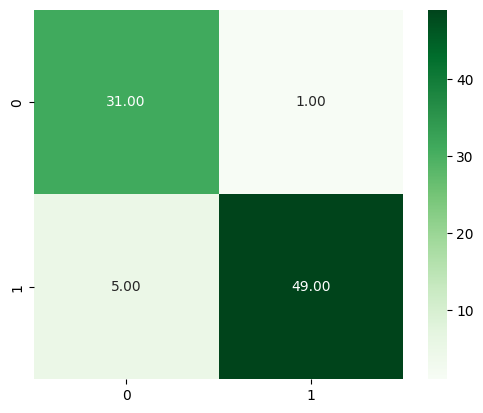

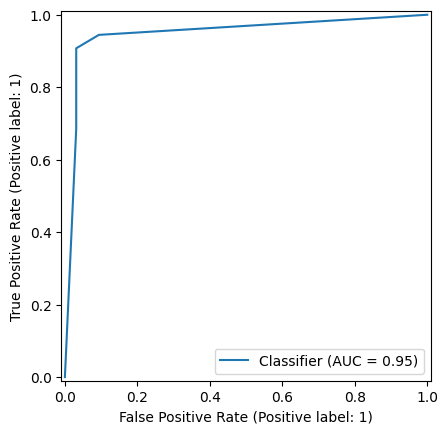

In [41]:
# Metrics for the test --> DT ( Thresholded probability )
cm = confusion_matrix(Y_test, predictions_DT)
acc = accuracy_score(Y_test, predictions_DT)
pc = precision_score(Y_test, predictions_DT)
f1 = f1_score(Y_test, predictions_DT)
AUC = roc_auc_score(Y_test, predictions_DT)
sen = recall_score(Y_test, predictions_DT)
TN = cm[0,0]
FP = cm[0,1]
spec = TN/(TN+FP)
print(F'spec: {spec}')
print(f'acc: {acc}')
print(f'pc : {pc}')
print(f'f1 : {f1}')
print(f'AUC: {AUC}')
print(f'sen: {sen}')
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
sns.heatmap(cm_df, square=True, cmap='Greens', annot=True, fmt='.2f')
ROC = RocCurveDisplay.from_predictions(Y_test, proba_DT)

# KNN model

In [42]:
### GRID SEARCH ###


# setting the cross validation
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()


n_splits = 10
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)



# List of parameters for Decision Tree
parameters_KNN = ({'n_neighbors':list(range(1,10)), 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1,2], 'metric':['minkowski', 'euclidean', 'manhattan'], 'leaf_size':[10,20,30,40]})


model_KNN = KNeighborsClassifier()

In [43]:
gs_KNN = GridSearchCV(estimator=model_KNN, param_grid=parameters_KNN, cv=cv, scoring='accuracy')
gs_KNN.fit(X_train, Y_train)
print(gs_KNN.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


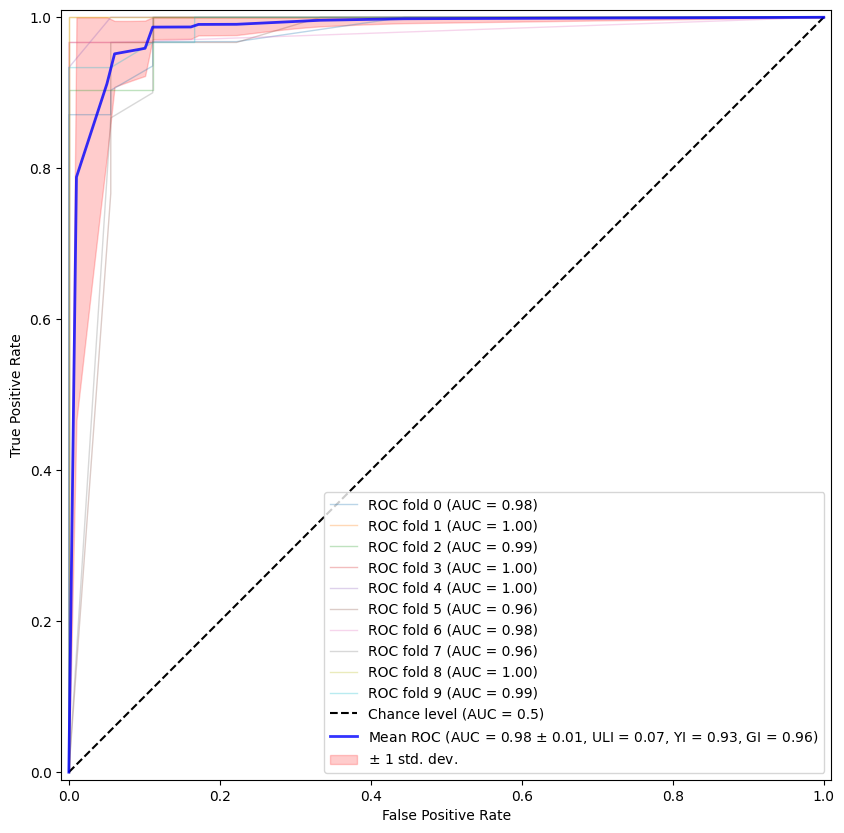

acc: 0.9668737060041408
spec: 0.9722222222222222
pc : 0.9831649831649831
f1 : 0.9733333333333333
sen: 0.9636963696369637


In [ ]:
# ==========================================
# Helper Functions: Threshold Optimization
# ==========================================

def calc_ULI(Y_test, proba_KNN):
    """
    Calculates the Unit Less Index (ULI) for all possible probability thresholds.
    The ULI measures the Euclidean distance from a specific point on the ROC curve 
    to the 'perfect classification' point (Top-Left corner: FPR=0, TPR=1).
    Lower ULI values indicate better performance.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_KNN)
    for i in range(len(fpr)):
        # Calculate distance to (0, 1)
        side = ((tpr[i]-1)**2 + (fpr[i]**2))**(1/2)
        ulis.append(side)
    return min(ulis) # Return the minimum distance (best score) found

def ULI_threshold(Y_test, proba_KNN):
    """
    Identifies the specific probability threshold that minimizes the ULI.
    This function finds the optimal operating point on the ROC curve.
    Returns: The specific FPR, TPR, and the probability Threshold value at that point.
    """
    uli_list = []
    uli = 2 # Initialize with a value larger than max possible distance (sqrt(2))
    fpr, tpr, threshold = roc_curve(Y_test, proba_KNN)
    
    for i in range(len(fpr)):
        side = np.sqrt((tpr[i]-1)**2 + (fpr[i]**2))
        uli_list.append(side)
        if side < uli:
            uli = side
            
    min_uli = min(uli_list)
    min_index = uli_list.index(min_uli)
    
    return fpr[min_index], tpr[min_index], threshold[min_index]

def calc_YI(Y_test, proba_KNN):
    """
    Calculates Youden's Index (YI).
    YI = Sensitivity + Specificity - 1 (or TPR - FPR).
    This metric measures the maximum vertical distance between the ROC curve 
    and the diagonal chance line.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_KNN)
    for i in range(len(fpr)):
        side = (tpr[i]-fpr[i])
        ulis.append(side)
    return round(max(ulis), 3)


# ==========================================
# Initialization
# ==========================================

# Lists to aggregate Confusion Matrix counts across all K-folds
# We sum these up to calculate "Pooled" metrics (Macro-average performance)
cm_KNN_TP = []
cm_KNN_FP = []
cm_KNN_TN = []
cm_KNN_FN = []

# Lists to store ROC curve data for plotting the Mean ROC later
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # Standardized x-axis for averaging ROC curves

fig, ax = plt.subplots(figsize=(10, 10))

# ==========================================
# Cross-Validation Loop
# ==========================================
# We iterate through each split defined by the 'cv' object (StratifiedKFold)
for fold, (train_index, test_index) in enumerate(cv.split(X_train, Y_train)):
    
    # 1. Split Data for this Fold
    x_train, x_test = X_train[train_index, :], X_train[test_index, :]
    y_train, y_test = Y_train[train_index], Y_train[test_index]

    # 2. Configure & Train KNN Model
    # We initialize KNN using the best hyperparameters found previously via GridSearchCV (gs_KNN).
    # All parameters (n_neighbors, weights, algorithm, p, metric, leaf_size) are explicitly passed.
    model_KNN = KNeighborsClassifier(
        n_neighbors=gs_KNN.best_params_['n_neighbors'],
        weights=gs_KNN.best_params_['weights'],
        algorithm=gs_KNN.best_params_['algorithm'],
        p=gs_KNN.best_params_['p'],
        metric=gs_KNN.best_params_['metric'],
        leaf_size=gs_KNN.best_params_['leaf_size']
    )
    model_KNN.fit(x_train, y_train)

    # 3. Predict Probabilities
    # We extract the probability of the positive class (index 1) for ROC analysis.
    y_pred_KNN = model_KNN.predict_proba(x_test)[:,1]

    # 4. Calculate Threshold Optimization Metrics
    ULI_1 = calc_ULI(y_test, y_pred_KNN)
    YI_1 = calc_YI(y_test, y_pred_KNN)
    
    # Identify the specific threshold that optimizes performance (minimizes ULI) for THIS fold
    x_roc_1, y_roc_1, thresh_mainKNN_b = ULI_threshold(y_test, y_pred_KNN)

    # 5. Apply Optimal Threshold
    # Instead of the default 0.5, we use the optimized threshold to convert probabilities to classes.
    custom_threshold = thresh_mainKNN_b
    y_pred_hard = (y_pred_KNN >= thresh_mainKNN_b).astype(int) # Renamed for clarity

    # 6. Confusion Matrix & Accumulation
    # Compute CM for the current fold
    cm_KNN = confusion_matrix(y_test, y_pred_hard)

    # Store components (TN, FP, TP, FN)
    TN = cm_KNN[0,0]
    cm_KNN_TN.append(TN)
    FP = cm_KNN[0,1]
    cm_KNN_FP.append(FP)
    TP = cm_KNN[1,1]
    cm_KNN_TP.append(TP)
    FN = cm_KNN[1,0]
    cm_KNN_FN.append(FN)

    # Calculate Cumulative Sums (Total counts across all folds processed so far)
    TN_t = np.sum(cm_KNN_TN)
    FP_t = np.sum(cm_KNN_FP)
    TP_t = np.sum(cm_KNN_TP)
    FN_t = np.sum(cm_KNN_FN)

    # 7. Calculate Cumulative Performance Metrics
    # These metrics represent the weighted average performance across all folds up to this point.
    sensitivity = TP_t / (TP_t + FN_t)
    specificity = TN_t / (TN_t + FP_t)
    precission = TP_t / (TP_t + FP_t)
    accuracy = (TP_t + TN_t) / (TP_t + TN_t + FP_t + FN_t)
    F1 = 2 * (precission * sensitivity) / (precission + sensitivity)

    # 8. Plot ROC Curve for this Fold
    viz = RocCurveDisplay.from_estimator(
        model_KNN,
        x_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1), # Only plot the chance line on the last fold
    )

    # Interpolate TPR to allow averaging later
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


# ==========================================
# Final Aggregated Plotting
# ==========================================

# Calculate Mean ROC Curve across all folds
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0 # Ensure curve ends at (1, 1)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot Mean ROC
# Note: The label includes ULI/YI from the *last fold* iteration (ULI_1, YI_1).
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f, ULI = %0.2f, YI = %0.2f, GI = %0.2f)" % (mean_auc, std_auc, ULI_1, YI_1, 2*(mean_auc-0.5)),
    lw=2,
    alpha=0.8,
)

# Plot Standard Deviation Shade (Confidence Interval)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

# ==========================================
# Final Metrics Printout
# ==========================================
# Print the final pooled metrics calculated after the last fold
print(f'acc: {accuracy}')
print(f'spec: {specificity}')
print(f'pc : {precission}')
print(f'f1 : {F1}')
print(f'sen: {sensitivity}')

In [45]:
# Predicting the test set

# Probability prediction of KNN
proba_KNN = model_KNN.predict_proba(X_test)[:, 1]

# Logical prediction of KNN
prob_KNN_SIMPLE = model_KNN.predict(X_test)

print(model_KNN.predict(X_test))
print(model_KNN.predict_proba(X_test)[:,0])

[0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 1]
[1.    1.    1.    0.    1.    0.    0.375 1.    1.    0.    1.    0.875
 0.    0.    1.    0.    0.    0.    0.5   0.    1.    1.    1.    1.
 0.125 0.    0.    0.25  0.    0.    1.    0.    0.    0.    1.    1.
 0.    0.    1.    0.    0.    0.375 0.    1.    1.    1.    0.375 0.
 1.    0.    0.    0.875 1.    0.    0.    0.125 1.    1.    0.    0.
 0.375 0.    0.    1.    0.625 0.    0.    0.    0.    0.    0.    0.
 0.    1.    0.75  1.    1.    0.125 0.    0.    0.    1.    0.    1.
 0.625 0.   ]


In [ ]:
# Predictions based on optimum threshold
# Instead of custom threshold (which is the optimum threshold for test dataset), thresh_mainKNN_b is being used which is the threshold for train dataset
predictions_KNN = (proba_KNN >= thresh_mainKNN_b).astype(int)
print(predictions_KNN)

[0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 1]


spec: 0.96875
acc: 0.9418604651162791
pc : 0.9803921568627451
f1 : 0.9523809523809523
AUC: 0.947337962962963
sen: 0.9259259259259259


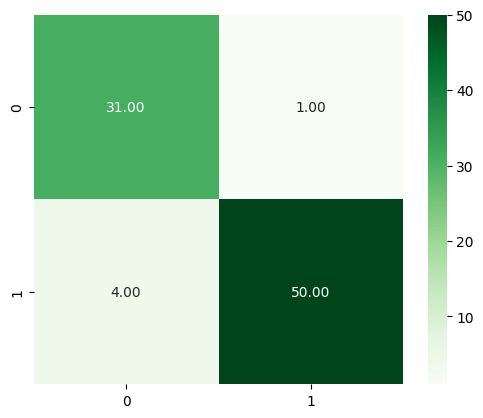

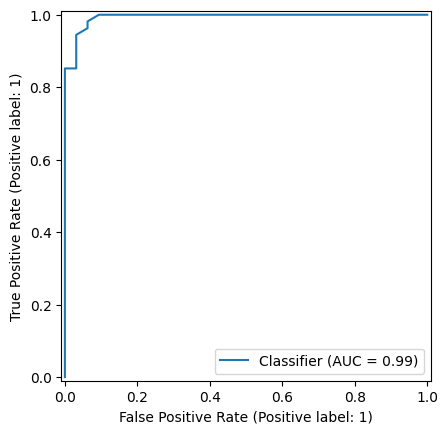

In [47]:
# Metrics for the test --> KNN ( Thresholded probability )
cm = confusion_matrix(Y_test, predictions_KNN)
acc = accuracy_score(Y_test, predictions_KNN)
pc = precision_score(Y_test, predictions_KNN)
f1 = f1_score(Y_test, predictions_KNN)
AUC = roc_auc_score(Y_test, predictions_KNN)
sen = recall_score(Y_test, predictions_KNN)
TN = cm[0,0]
FP = cm[0,1]
spec = TN/(TN+FP)
print(F'spec: {spec}')
print(f'acc: {acc}')
print(f'pc : {pc}')
print(f'f1 : {f1}')
print(f'AUC: {AUC}')
print(f'sen: {sen}')
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
sns.heatmap(cm_df, square=True, cmap='Greens', annot=True, fmt='.2f')
ROC = RocCurveDisplay.from_predictions(Y_test, proba_KNN)

# XGB model

In [48]:
### GRID SEARCH ###


# setting the cross validation
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()


n_splits = 10
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)




# List of parameters for XGBoost
parameters_XGB = ({'n_estimators':[50, 100, 200, 300], 'max_depth':[3, 5, 7, 9], 'learning_rate':[0.01, 0.1], 'subsample':[0.6, 0.8, 1.0], 'colsample_bytree':[0.6, 0.8, 1.0], 'gamma':[0, 0.1, 0.2, 0.3]})


model_XGB = XGBClassifier()

In [ ]:
gs_XGB = GridSearchCV(estimator=model_XGB, param_grid=parameters_XGB, cv=cv, scoring='accuracy')
gs_XGB.fit(X_train, Y_train)
print(gs_XGB.best_params_)

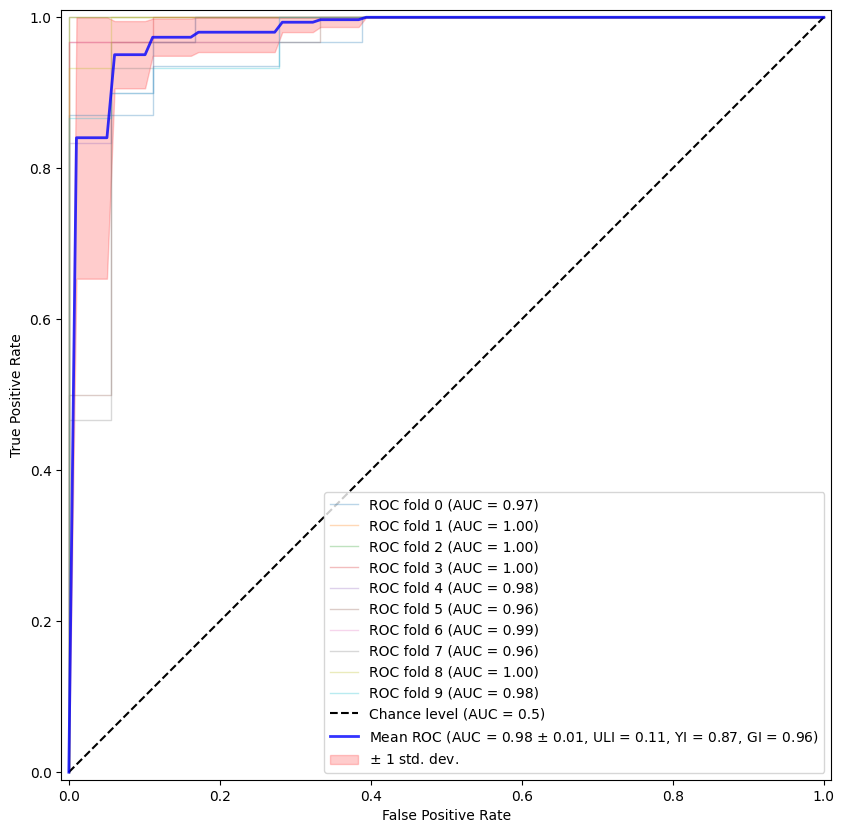

acc: 0.9585921325051759
spec: 0.9611111111111111
pc : 0.9764309764309764
f1 : 0.9666666666666667
sen: 0.9570957095709571


In [ ]:
# ==========================================
# Helper Functions: Threshold Optimization
# ==========================================

def calc_ULI(Y_test, proba_XGB):
    """
    Calculates the Unit Less Index (ULI) for all thresholds.
    ULI measures the Euclidean distance from the perfect classification point (0,1).
    Lower is better.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_XGB)
    for i in range(len(fpr)):
        side = ((tpr[i]-1)**2 + (fpr[i]**2))**(1/2)
        ulis.append(side)
    return min(ulis) # Return minimum distance found

def ULI_threshold(Y_test, proba_XGB):
    """
    Finds the specific threshold that minimizes ULI.
    This helps find the optimal balance point between Sensitivity and Specificity.
    Returns: (FPR, TPR, Optimal Threshold)
    """
    uli_list = []
    uli = 2 # Initialize with max possible distance (sqrt(2))
    fpr, tpr, threshold = roc_curve(Y_test, proba_XGB)
    
    for i in range(len(fpr)):
        side = np.sqrt((tpr[i]-1)**2 + (fpr[i]**2))
        uli_list.append(side)
        if side < uli:
            uli = side
            
    min_uli = min(uli_list)
    min_index = uli_list.index(min_uli)
    
    return fpr[min_index], tpr[min_index], threshold[min_index]

def calc_YI(Y_test, proba_XGB):
    """
    Calculates Youden's Index (YI).
    YI = Sensitivity + Specificity - 1.
    Measures the maximum vertical distance from the ROC curve to the diagonal chance line.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_XGB)
    for i in range(len(fpr)):
        side = (tpr[i]-fpr[i])
        ulis.append(side)
    return round(max(ulis), 3)


# ==========================================
# Initialization
# ==========================================

# Lists to aggregate Confusion Matrix stats across all K-folds
# Used to calculate "Pooled" performance metrics later
cm_XGB_TP = []
cm_XGB_FP = []
cm_XGB_TN = []
cm_XGB_FN = []

# Lists to store ROC data for averaging
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # Standardized x-axis for Mean ROC

fig, ax = plt.subplots(figsize=(10, 10))

# ==========================================
# Cross-Validation Loop
# ==========================================
for fold, (train_index, test_index) in enumerate(cv.split(X_train, Y_train)):
    
    # 1. Split Data for this Fold
    x_train, x_test = X_train[train_index, :], X_train[test_index, :]
    y_train, y_test = Y_train[train_index], Y_train[test_index]

    # 2. Configure & Train XGBoost
    # Note: We use a fixed configuration here rather than a GridSearchCV object
    model_XGB = XGBClassifier(
        objective="binary:logistic",
        eval_metric='logloss',
        tree_method="exact", # 'hist' is faster for large data, 'exact' for small
        random_state=42,
        n_estimators=5000,      # High number allowed because we use early stopping
        learning_rate=0.01,     # Low learning rate for robust generalization
        max_depth=20,           # Deep trees (beware of overfitting on small data)
        subsample=0.8,          # Train on 80% of data per tree (prevents overfitting)
        colsample_bytree=0.8,   # Use 80% of features per tree
        reg_lambda=1,           # L2 Regularization
        scale_pos_weight=2,     # Handles class imbalance (weight for positive class)
        n_jobs=-1,
    )
    
    # Fit with Early Stopping
    # Monitoring 'x_test' allows the model to stop training if validation error stops improving
    # This prevents the 'n_estimators=5000' from overfitting.
    model_XGB.fit(
        x_train, y_train,
        eval_set=[(x_test, y_test)],
        verbose=True # Set to True to see training logs per epoch
    )

    # 3. Predict Probabilities
    # Get probabilities for the positive class (1)
    y_pred_XGB = model_XGB.predict_proba(x_test)[:,1]

    # 4. Calculate Threshold Optimization Metrics
    ULI_1 = calc_ULI(y_test, y_pred_XGB)
    YI_1 = calc_YI(y_test, y_pred_XGB)
    
    # Find optimal threshold for this specific fold
    x_roc_1, y_roc_1, thresh_mainXGB_b = ULI_threshold(y_test, y_pred_XGB)

    # 5. Apply Optimal Threshold
    # Convert probability to class label using the custom threshold
    custom_threshold = thresh_mainXGB_b
    y_pred_hard = (y_pred_XGB >= thresh_mainXGB_b).astype(int) # Renamed for clarity

    # 6. Confusion Matrix & Accumulation
    # Compute CM for current fold
    cm_XGB = confusion_matrix(y_test, y_pred_hard)

    # Store components
    TN = cm_XGB[0,0]
    cm_XGB_TN.append(TN)
    FP = cm_XGB[0,1]
    cm_XGB_FP.append(FP)
    TP = cm_XGB[1,1]
    cm_XGB_TP.append(TP)
    FN = cm_XGB[1,0]
    cm_XGB_FN.append(FN)

    # Update Cumulative Sums
    TN_t = np.sum(cm_XGB_TN)
    FP_t = np.sum(cm_XGB_FP)
    TP_t = np.sum(cm_XGB_TP)
    FN_t = np.sum(cm_XGB_FN)

    # 7. Calculate Cumulative Performance Metrics
    # Weighted average performance across all folds processed so far
    sensitivity = TP_t / (TP_t + FN_t)
    specificity = TN_t / (TN_t + FP_t)
    precission = TP_t / (TP_t + FP_t)
    accuracy = (TP_t + TN_t) / (TP_t + TN_t + FP_t + FN_t)
    F1 = 2 * (precission * sensitivity) / (precission + sensitivity)

    # 8. Plot ROC Curve for this Fold
    # Note: .from_estimator will use the model's default predict_proba (0.5 threshold logic for plots)
    # The AUC calculation is threshold-independent.
    viz = RocCurveDisplay.from_estimator(
        model_XGB,
        x_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )

    # Interpolate TPR for Mean ROC calculation
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


# ==========================================
# Final Aggregated Plotting
# ==========================================

# Calculate Mean ROC Curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot Mean ROC
# Shows the average performance across all folds
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f, ULI = %0.2f, YI = %0.2f, GI = %0.2f)" % (mean_auc, std_auc, ULI_1, YI_1, 2*(mean_auc-0.5)),
    lw=2,
    alpha=0.8,
)

# Plot Confidence Interval (Standard Deviation)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

# ==========================================
# Final Metrics Printout
# ==========================================
# Print final pooled metrics
print(f'acc: {accuracy}')
print(f'spec: {specificity}')
print(f'pc : {precission}')
print(f'f1 : {F1}')
print(f'sen: {sensitivity}')

In [50]:
# Predicting the test set

# Probability prediction of XGB
proba_XGB = model_XGB.predict_proba(X_test)[:, 1]

# Logical prediction of XGB
prob_XGB_SIMPLE = model_XGB.predict(X_test)

print(model_XGB.predict(X_test))
print(model_XGB.predict_proba(X_test)[:,0])

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1]
[9.9906468e-01 9.9944127e-01 9.9992889e-01 1.7899275e-04 9.9993026e-01
 4.3445826e-04 5.8412153e-01 9.9692458e-01 9.9744856e-01 2.4408102e-04
 9.9146628e-01 9.9992847e-01 1.5159249e-03 5.3712904e-02 9.6174061e-01
 4.0537119e-04 3.9814115e-03 5.0379038e-03 3.6677295e-01 9.2864037e-05
 9.9994624e-01 9.7054416e-01 9.9962199e-01 9.9989229e-01 1.3396740e-03
 7.7366829e-05 1.0427237e-03 2.2941709e-02 2.6345253e-05 3.2210946e-03
 9.7987437e-01 1.0729432e-03 1.0794300e-01 1.2825727e-03 9.9994332e-01
 9.9985421e-01 4.6133995e-05 1.1124015e-03 9.9980843e-01 5.9347230e-01
 9.2029572e-05 8.9043379e-03 3.8266182e-05 9.9864250e-01 9.9976224e-01
 9.9986207e-01 3.0523002e-02 1.0490417e-03 9.9990046e-01 6.2012672e-04
 3.2305717e-05 9.9889320e-01 9.9993110e-01 1.8022656e-03 1.0931492e-04
 6.3276291e-03 9.9984837e-01 9.9194211e-01 

In [ ]:
# Predictions based on optimum threshold
# Instead of custom threshold (which is the optimum threshold for test dataset), thresh_mainXGB_b is being used which is the threshold for train dataset
predictions_XGB = (proba_XGB >= thresh_mainXGB_b).astype(int)
print(predictions_XGB)

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1]


spec: 0.9375
acc: 0.9302325581395349
pc : 0.9615384615384616
f1 : 0.9433962264150944
AUC: 0.931712962962963
sen: 0.9259259259259259


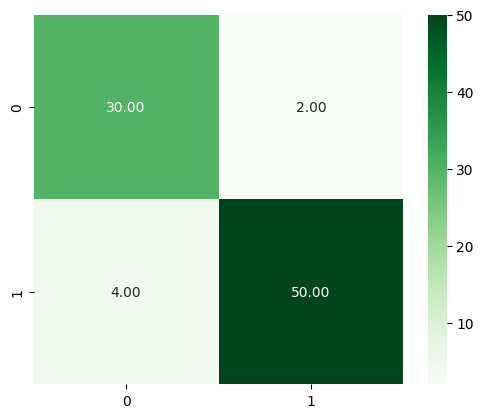

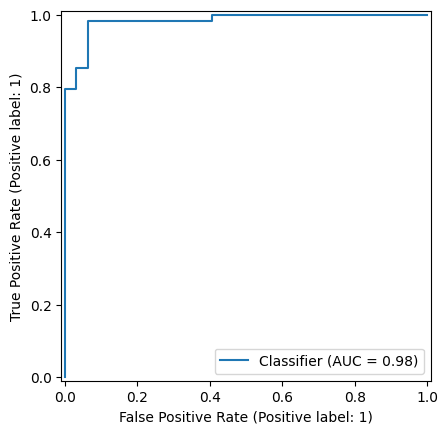

In [52]:
# Metrics for the test --> XGB ( Thresholded probability )
cm = confusion_matrix(Y_test, predictions_XGB)
acc = accuracy_score(Y_test, predictions_XGB)
pc = precision_score(Y_test, predictions_XGB)
f1 = f1_score(Y_test, predictions_XGB)
AUC = roc_auc_score(Y_test, predictions_XGB)
sen = recall_score(Y_test, predictions_XGB)
TN = cm[0,0]
FP = cm[0,1]
spec = TN/(TN+FP)
print(F'spec: {spec}')
print(f'acc: {acc}')
print(f'pc : {pc}')
print(f'f1 : {f1}')
print(f'AUC: {AUC}')
print(f'sen: {sen}')
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
sns.heatmap(cm_df, square=True, cmap='Greens', annot=True, fmt='.2f')
ROC = RocCurveDisplay.from_predictions(Y_test, proba_XGB)

# NB model

In [53]:
### GRID SEARCH ###


# setting the cross validation
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()


n_splits = 10
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)



# List of parameters for Decision Tree
parameters_NB = ({'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],})


model_NB = GaussianNB()

In [54]:
gs_NB = GridSearchCV(estimator=model_NB, param_grid=parameters_NB, cv=cv, scoring='accuracy')
gs_NB.fit(X_train, Y_train)
print(gs_NB.best_params_)

{'var_smoothing': 1e-09}


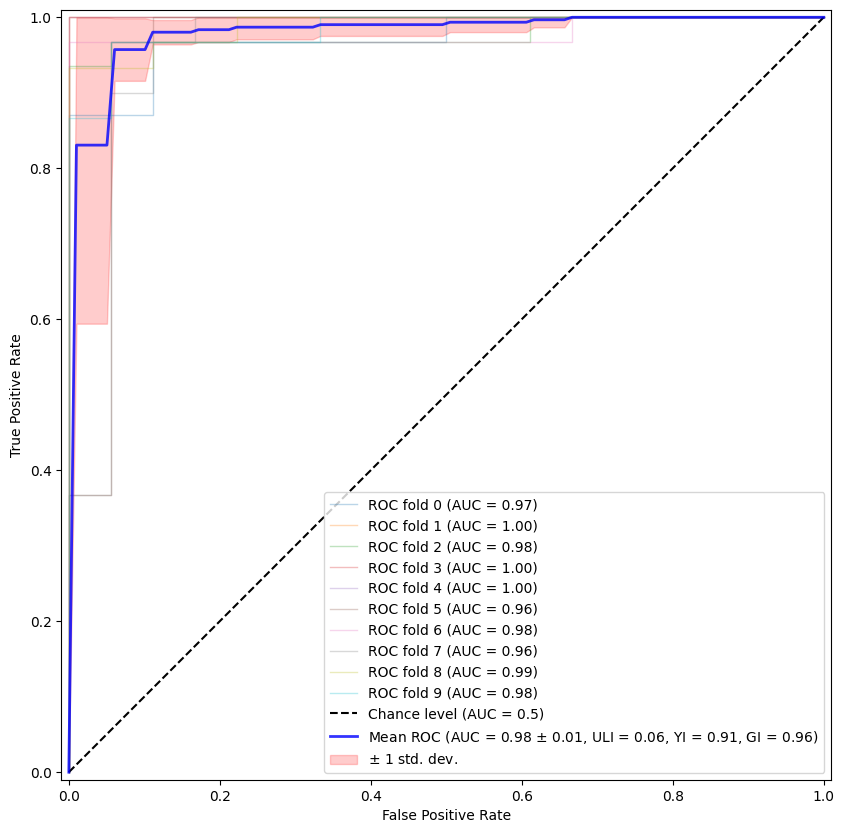

acc: 0.9668737060041408
spec: 0.9666666666666667
pc : 0.979933110367893
f1 : 0.973421926910299
sen: 0.966996699669967


In [ ]:
# ==========================================
# Helper Functions: Threshold Optimization
# ==========================================

def calc_ULI(Y_test, proba_NB):
    """
    Calculates the Unit Less Index (ULI) across all thresholds.
    The ULI represents the Euclidean distance from a specific point on the ROC curve 
    to the ideal classification point (Top-Left corner: FPR=0, TPR=1).
    Lower ULI values correspond to better model performance.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_NB)
    for i in range(len(fpr)):
        # Calculate distance to (0, 1)
        side = ((tpr[i]-1)**2 + (fpr[i]**2))**(1/2)
        ulis.append(side)
    return min(ulis) # Return the best (minimum) distance found

def ULI_threshold(Y_test, proba_NB):
    """
    Identifies the probability threshold that minimizes the ULI.
    This function finds the optimal operating point on the ROC curve where
    Sensitivity and Specificity are balanced according to the ULI criterion.
    Returns: (FPR, TPR, Optimal Threshold)
    """
    uli_list = []
    uli = 2 # Initialize with a value larger than max possible distance (sqrt(2))
    fpr, tpr, threshold = roc_curve(Y_test, proba_NB)
    
    for i in range(len(fpr)):
        side = np.sqrt((tpr[i]-1)**2 + (fpr[i]**2))
        uli_list.append(side)
        if side < uli:
            uli = side
            
    min_uli = min(uli_list)
    min_index = uli_list.index(min_uli)
    
    return fpr[min_index], tpr[min_index], threshold[min_index]

def calc_YI(Y_test, proba_NB):
    """
    Calculates Youden's Index (YI).
    YI = Sensitivity + Specificity - 1 (or TPR - FPR).
    It measures the maximum vertical distance between the ROC curve 
    and the diagonal chance line (random guessing).
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_NB)
    for i in range(len(fpr)):
        side = (tpr[i]-fpr[i])
        ulis.append(side)
    return round(max(ulis), 3)


# ==========================================
# Initialization
# ==========================================

# Lists to aggregate Confusion Matrix counts across all folds.
# Summing these allows us to calculate "Pooled" performance metrics later.
cm_NB_TP = []
cm_NB_FP = []
cm_NB_TN = []
cm_NB_FN = []

# Lists to store ROC curve data for plotting the Mean ROC later
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # Standardized x-axis for averaging ROC curves

fig, ax = plt.subplots(figsize=(10, 10))

# ==========================================
# Cross-Validation Loop
# ==========================================
# Iterate through each split defined by the 'cv' object (StratifiedKFold)
for fold, (train_index, test_index) in enumerate(cv.split(X_train, Y_train)):
    
    # 1. Split Data for this Fold
    x_train, x_test = X_train[train_index, :], X_train[test_index, :]
    y_train, y_test = Y_train[train_index], Y_train[test_index]

    # 2. Configure & Train Gaussian Naive Bayes Model
    # We initialize GaussianNB with the best 'var_smoothing' parameter found via GridSearchCV (gs_NB).
    # 'var_smoothing' adds a portion of the largest variance to all features to stabilize calculation.
    model_NB = GaussianNB(var_smoothing=gs_NB.best_params_['var_smoothing'])
    model_NB.fit(x_train, y_train)

    # 3. Predict Probabilities
    # Extract probabilities for the positive class (index 1) for ROC analysis.
    y_pred_NB = model_NB.predict_proba(x_test)[:,1]

    # 4. Calculate Threshold Optimization Metrics
    ULI_1 = calc_ULI(y_test, y_pred_NB)
    YI_1 = calc_YI(y_test, y_pred_NB)
    
    # Identify the specific threshold that optimizes performance (minimizes ULI) for THIS fold
    x_roc_1, y_roc_1, thresh_mainNB_b = ULI_threshold(y_test, y_pred_NB)

    # 5. Apply Optimal Threshold
    # Use the optimized threshold to convert probabilities to hard class labels (0 or 1).
    custom_threshold = thresh_mainNB_b
    y_pred_hard = (y_pred_NB >= thresh_mainNB_b).astype(int) # Renamed for clarity

    # 6. Confusion Matrix & Accumulation
    # Compute CM for the current fold
    cm_NB = confusion_matrix(y_test, y_pred_hard)

    # Store components (TN, FP, TP, FN)
    TN = cm_NB[0,0]
    cm_NB_TN.append(TN)
    FP = cm_NB[0,1]
    cm_NB_FP.append(FP)
    TP = cm_NB[1,1]
    cm_NB_TP.append(TP)
    FN = cm_NB[1,0]
    cm_NB_FN.append(FN)

    # Calculate Cumulative Sums (Total counts across all folds processed so far)
    TN_t = np.sum(cm_NB_TN)
    FP_t = np.sum(cm_NB_FP)
    TP_t = np.sum(cm_NB_TP)
    FN_t = np.sum(cm_NB_FN)

    # 7. Calculate Cumulative Performance Metrics
    # These represent the weighted average performance across all folds up to this point.
    sensitivity = TP_t / (TP_t + FN_t)
    specificity = TN_t / (TN_t + FP_t)
    precission = TP_t / (TP_t + FP_t)
    accuracy = (TP_t + TN_t) / (TP_t + TN_t + FP_t + FN_t)
    F1 = 2 * (precission * sensitivity) / (precission + sensitivity)

    # 8. Plot ROC Curve for this Fold
    viz = RocCurveDisplay.from_estimator(
        model_NB,
        x_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1), # Only plot chance line on the last fold
    )

    # Interpolate TPR to allow averaging later
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


# ==========================================
# Final Aggregated Plotting
# ==========================================

# Calculate Mean ROC Curve across all folds
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0 # Ensure curve ends at (1, 1)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot Mean ROC
# Note: The label includes ULI/YI from the *last fold* iteration (ULI_1, YI_1).
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f, ULI = %0.2f, YI = %0.2f, GI = %0.2f)" % (mean_auc, std_auc, ULI_1, YI_1, 2*(mean_auc-0.5)),
    lw=2,
    alpha=0.8,
)

# Plot Standard Deviation Shade (Confidence Interval)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

# ==========================================
# Final Metrics Printout
# ==========================================
# Print the final pooled metrics calculated after the last fold
print(f'acc: {accuracy}')
print(f'spec: {specificity}')
print(f'pc : {precission}')
print(f'f1 : {F1}')
print(f'sen: {sensitivity}')

In [56]:
# Predicting the test set

# Probability prediction of NB
proba_NB = model_NB.predict_proba(X_test)[:, 1]

# Logical prediction of NB
prob_NB_SIMPLE = model_NB.predict(X_test)

print(model_NB.predict(X_test))
print(model_NB.predict_proba(X_test)[:,0])

[0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 1]
[9.74391693e-01 9.95540718e-01 9.99999883e-01 1.73336083e-03
 1.00000000e+00 2.10126756e-02 4.70029456e-01 9.69350507e-01
 9.99943383e-01 2.61055472e-02 1.00000000e+00 9.99821619e-01
 3.82775626e-03 1.09544308e-01 9.38270391e-01 1.40288128e-02
 1.51074544e-02 1.52996549e-03 2.44826599e-01 1.89174391e-02
 1.00000000e+00 9.99990134e-01 9.89144438e-01 9.99999994e-01
 4.68947241e-02 5.02551662e-03 3.47856215e-04 1.65800437e-01
 2.53078526e-03 2.77072026e-02 9.99999693e-01 2.94513922e-04
 9.37778691e-02 3.81604861e-03 9.99999960e-01 9.92558855e-01
 1.02099240e-02 1.20400864e-03 9.99990658e-01 2.17277790e-01
 2.58460830e-03 2.52935219e-01 1.37458970e-03 9.24285126e-01
 9.99801983e-01 1.00000000e+00 2.99723588e-01 2.55319945e-03
 1.00000000e+00 1.29375292e-02 3.46732195e-03 9.25841883e-01
 1.00000000e+00 2.70260090e-02 

In [ ]:
# Predictions based on optimum threshold
# Instead of custom threshold (which is the optimum threshold for test dataset), thresh_mainNB_b is being used which is the threshold for train dataset
predictions_NB = (proba_NB >= thresh_mainNB_b).astype(int)
print(predictions_NB)

[0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 1]


spec: 0.9375
acc: 0.9418604651162791
pc : 0.9622641509433962
f1 : 0.9532710280373832
AUC: 0.9409722222222222
sen: 0.9444444444444444


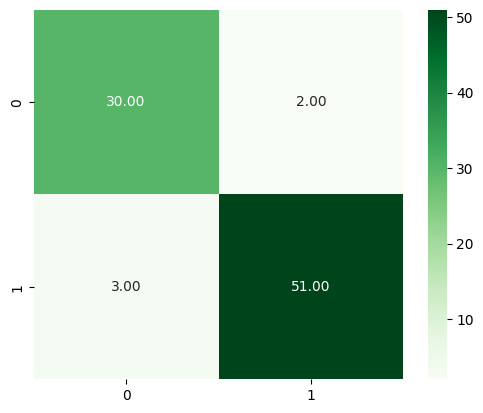

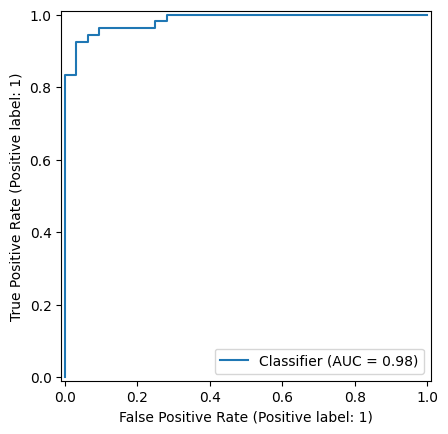

In [58]:
# Metrics for the test --> NB ( Thresholded probability )
cm = confusion_matrix(Y_test, predictions_NB)
acc = accuracy_score(Y_test, predictions_NB)
pc = precision_score(Y_test, predictions_NB)
f1 = f1_score(Y_test, predictions_NB)
AUC = roc_auc_score(Y_test, predictions_NB)
sen = recall_score(Y_test, predictions_NB)
TN = cm[0,0]
FP = cm[0,1]
spec = TN/(TN+FP)
print(F'spec: {spec}')
print(f'acc: {acc}')
print(f'pc : {pc}')
print(f'f1 : {f1}')
print(f'AUC: {AUC}')
print(f'sen: {sen}')
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
sns.heatmap(cm_df, square=True, cmap='Greens', annot=True, fmt='.2f')
ROC = RocCurveDisplay.from_predictions(Y_test, proba_NB)

# RF model

In [59]:
### GRID SEARCH ###


# setting the cross validation
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = QuantileTransformer()


n_splits = 10
cv = StratifiedKFold(n_splits= n_splits, random_state= 42, shuffle=True)



# List of parameters for Random Forest
parameters_RF = ({'random_state':[42], 'n_estimators':[100, 200, 300, 400], 'max_depth':[10, 20, 30, 40], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4], 'bootstrap':[True]})


model_RF = RandomForestClassifier()

In [60]:
gs_RF = GridSearchCV(estimator=model_RF, param_grid=parameters_RF, cv=cv, scoring='accuracy')
gs_RF.fit(X_train, Y_train)
print(gs_RF.best_params_)

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}


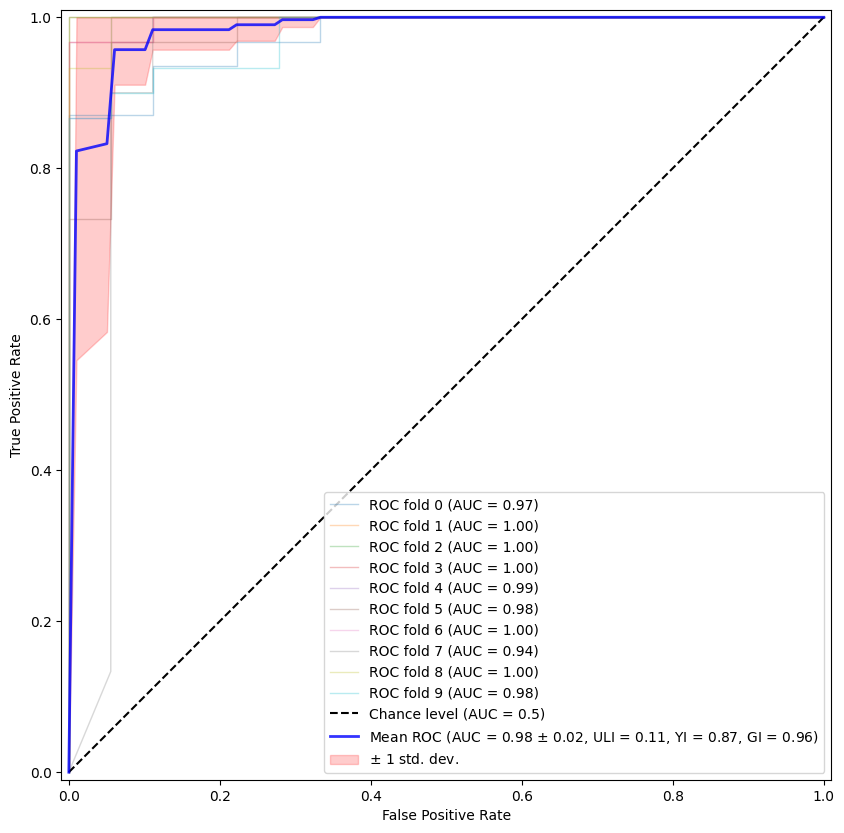

acc: 0.9668737060041408
spec: 0.9555555555555556
pc : 0.9735973597359736
f1 : 0.9735973597359736
sen: 0.9735973597359736


In [61]:
# ==========================================
# Helper Functions: Threshold Optimization
# ==========================================

def calc_ULI(Y_test, proba_RF):
    """
    Calculates the Unit Less Index (ULI) across all possible thresholds.
    The ULI measures the Euclidean distance from a specific point on the ROC curve 
    to the 'perfect classification' point (Top-Left corner: FPR=0, TPR=1).
    Lower ULI values indicate better performance (closer to perfect).
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_RF)
    for i in range(len(fpr)):
        # Calculate Euclidean distance to (0, 1)
        side = ((tpr[i]-1)**2 + (fpr[i]**2))**(1/2)
        ulis.append(side)
    return min(ulis) # Return the minimum distance found

def ULI_threshold(Y_test, proba_RF):
    """
    Identifies the probability threshold that minimizes the ULI.
    This function finds the optimal operating point on the ROC curve, balancing
    Sensitivity and Specificity according to the ULI criterion.
    Returns: (FPR, TPR, Optimal Threshold)
    """
    uli_list = []
    uli = 2 # Initialize with a value larger than max possible distance (sqrt(2))
    fpr, tpr, threshold = roc_curve(Y_test, proba_RF)
    
    for i in range(len(fpr)):
        side = np.sqrt((tpr[i]-1)**2 + (fpr[i]**2))
        uli_list.append(side)
        if side < uli:
            uli = side
            
    min_uli = min(uli_list)
    min_index = uli_list.index(min_uli)
    
    return fpr[min_index], tpr[min_index], threshold[min_index]

def calc_YI(Y_test, proba_RF):
    """
    Calculates Youden's Index (YI).
    YI = Sensitivity + Specificity - 1 (or TPR - FPR).
    It measures the maximum vertical distance between the ROC curve 
    and the diagonal chance line (random guessing). Higher is better.
    """
    ulis = []
    fpr, tpr, threshold = roc_curve(Y_test, proba_RF)
    for i in range(len(fpr)):
        side = (tpr[i]-fpr[i])
        ulis.append(side)
    return round(max(ulis), 3)


# ==========================================
# Initialization
# ==========================================

# Lists to aggregate Confusion Matrix counts across all K-folds.
# Summing these allows us to calculate "Pooled" performance metrics later.
cm_RF_TP = []
cm_RF_FP = []
cm_RF_TN = []
cm_RF_FN = []

# Lists to store ROC curve data for plotting the Mean ROC later
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # Standardized x-axis for averaging ROC curves

fig, ax = plt.subplots(figsize=(10, 10))

# ==========================================
# Cross-Validation Loop
# ==========================================
# Iterate through each split defined by the 'cv' object (StratifiedKFold)
for fold, (train_index, test_index) in enumerate(cv.split(X_train, Y_train)):
    
    # 1. Split Data for this Fold
    x_train, x_test = X_train[train_index, :], X_train[test_index, :]
    y_train, y_test = Y_train[train_index], Y_train[test_index]

    # 2. Configure & Train Random Forest Model
    # We initialize RandomForestClassifier with the best hyperparameters found via GridSearchCV (gs_RF).
    # Parameters include max_depth, split/leaf samples, n_estimators, and bootstrap setting.
    model_RF = RandomForestClassifier(
        random_state=42, 
        max_depth=gs_RF.best_params_['max_depth'], 
        min_samples_split=gs_RF.best_params_['min_samples_split'], 
        min_samples_leaf=gs_RF.best_params_['min_samples_leaf'], 
        n_estimators=gs_RF.best_params_['n_estimators'], 
        bootstrap=gs_RF.best_params_['bootstrap']
    )
    model_RF.fit(x_train, y_train)

    # 3. Predict Probabilities
    # Extract probabilities for the positive class (index 1) for ROC analysis.
    y_pred_RF = model_RF.predict_proba(x_test)[:,1]

    # 4. Calculate Threshold Optimization Metrics
    ULI_1 = calc_ULI(y_test, y_pred_RF)
    YI_1 = calc_YI(y_test, y_pred_RF)
    
    # Identify the specific threshold that optimizes performance (minimizes ULI) for THIS fold
    x_roc_1, y_roc_1, thresh_mainRF_b = ULI_threshold(y_test, y_pred_RF)

    # 5. Apply Optimal Threshold
    # Use the optimized threshold to convert probabilities to hard class labels (0 or 1).
    custom_threshold = thresh_mainRF_b
    y_pred_hard = (y_pred_RF >= thresh_mainRF_b).astype(int) # Renamed for clarity

    # 6. Confusion Matrix & Accumulation
    # Compute CM for the current fold
    cm_RF = confusion_matrix(y_test, y_pred_hard)

    # Store components (TN, FP, TP, FN)
    TN = cm_RF[0,0]
    cm_RF_TN.append(TN)
    FP = cm_RF[0,1]
    cm_RF_FP.append(FP)
    TP = cm_RF[1,1]
    cm_RF_TP.append(TP)
    FN = cm_RF[1,0]
    cm_RF_FN.append(FN)

    # Calculate Cumulative Sums (Total counts across all folds processed so far)
    TN_t = np.sum(cm_RF_TN)
    FP_t = np.sum(cm_RF_FP)
    TP_t = np.sum(cm_RF_TP)
    FN_t = np.sum(cm_RF_FN)

    # 7. Calculate Cumulative Performance Metrics
    # These represent the weighted average performance across all folds up to this point.
    sensitivity = TP_t / (TP_t + FN_t)
    specificity = TN_t / (TN_t + FP_t)
    precission = TP_t / (TP_t + FP_t)
    accuracy = (TP_t + TN_t) / (TP_t + TN_t + FP_t + FN_t)
    F1 = 2 * (precission * sensitivity) / (precission + sensitivity)

    # 8. Plot ROC Curve for this Fold
    viz = RocCurveDisplay.from_estimator(
        model_RF,
        x_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1), # Only plot chance line on the last fold
    )

    # Interpolate TPR to allow averaging later
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


# ==========================================
# Final Aggregated Plotting
# ==========================================

# Calculate Mean ROC Curve across all folds
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0 # Ensure curve ends at (1, 1)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot Mean ROC
# Note: The label includes ULI/YI from the *last fold* iteration (ULI_1, YI_1).
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f, ULI = %0.2f, YI = %0.2f, GI = %0.2f)" % (mean_auc, std_auc, ULI_1, YI_1, 2*(mean_auc-0.5)),
    lw=2,
    alpha=0.8,
)

# Plot Standard Deviation Shade (Confidence Interval)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

# ==========================================
# Final Metrics Printout
# ==========================================
# Print the final pooled metrics calculated after the last fold
print(f'acc: {accuracy}')
print(f'spec: {specificity}')
print(f'pc : {precission}')
print(f'f1 : {F1}')
print(f'sen: {sensitivity}')

In [62]:
# Predicting the test set

# Probability prediction of RF
proba_RF = model_RF.predict_proba(X_test)[:, 1]

# Logical prediction of RF
prob_RF_SIMPLE = model_RF.predict(X_test)

print(model_RF.predict(X_test))
print(model_RF.predict_proba(X_test)[:,0])

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1]
[0.97605447 0.96966672 0.99916667 0.01314123 1.         0.01168651
 0.58524838 0.8586562  0.90133593 0.04230429 0.91854736 0.99257143
 0.04637716 0.17685009 0.88168586 0.01507057 0.06238492 0.00615296
 0.38006004 0.0387803  0.9975     0.92615179 0.98689646 0.99833333
 0.08682305 0.00424242 0.         0.14990855 0.         0.09753365
 0.92124802 0.         0.25637446 0.03463907 1.         0.99268254
 0.00575    0.00452381 0.96663095 0.4784893  0.00208333 0.371316
 0.00166667 0.95541495 0.98825337 0.99516071 0.35175672 0.04460913
 0.99518254 0.02707359 0.00155556 0.97898336 0.98922024 0.10522061
 0.00422619 0.13539633 0.99595238 0.74827146 0.03508344 0.01359957
 0.54211715 0.00154762 0.01911742 0.89681591 0.3627062  0.0122619
 0.04982071 0.00242857 0.02361111 0.05463654 0.00125    0.14409511
 0.10419264 0.93832189 

In [63]:
# Predictions based on optimum threshold
# Instead of custom threshold (which is the optimum threshold for test dataset), thresh_mainRF_b is being used which is the threshold for train dataset
predictions_RF = (proba_RF >= thresh_mainRF_b).astype(int)
print(predictions_RF)

[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1]


spec: 0.9375
acc: 0.9418604651162791
pc : 0.9622641509433962
f1 : 0.9532710280373832
AUC: 0.9409722222222222
sen: 0.9444444444444444


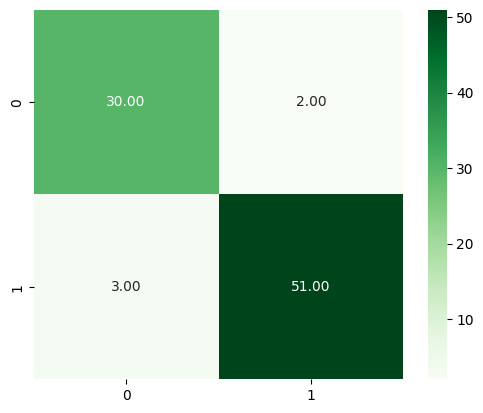

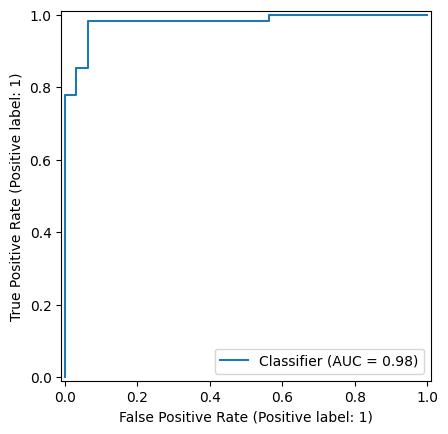

In [64]:
# Metrics for the test --> RF ( Thresholded probability )
cm = confusion_matrix(Y_test, predictions_RF)
acc = accuracy_score(Y_test, predictions_RF)
pc = precision_score(Y_test, predictions_RF)
f1 = f1_score(Y_test, predictions_RF)
AUC = roc_auc_score(Y_test, predictions_RF)
sen = recall_score(Y_test, predictions_RF)
TN = cm[0,0]
FP = cm[0,1]
spec = TN/(TN+FP)
print(F'spec: {spec}')
print(f'acc: {acc}')
print(f'pc : {pc}')
print(f'f1 : {f1}')
print(f'AUC: {AUC}')
print(f'sen: {sen}')
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
sns.heatmap(cm_df, square=True, cmap='Greens', annot=True, fmt='.2f')
ROC = RocCurveDisplay.from_predictions(Y_test, proba_RF)